___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

import missingno as msno

import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.rcParams["figure.figsize"] = (10,8)

In [2]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
path_1 = "ANSUR II MALE Public.csv"
path_2 = "ANSUR II FEMALE Public.csv"

df_male = pd.read_csv(path_1, encoding="ISO-8859-1")
df_female = pd.read_csv(path_2, encoding="ISO-8859-1")

In [4]:
#Here i will concat the two files
df = pd.concat([df_male, df_female])

In [5]:
df.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0  10027.000                             266            1467   
1  10032.000                             233            1395   
2  10033.000                             287            1430   
3  10092.000                             234            1347   
4  10093.000                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  ...  PrimaryMOS  SubjectsBirthLocation  \
0                        369  ...         19D           North Dakota   
1                        338  ...         68W               New York   
2                        408  ...         68W               New York   
3                        359  ...         88M              Wisconsin   
4                        356  ...         92G         North Carolina   

   SubjectNumericRace  Ethnicity  DODRace  Age  Heightin  Weightlbs  \
0                   1        NaN        1   41        71        180   
1                   1        NaN        1   35        68        160   
2                   2        NaN        2   42        68        205   
3                   1        NaN        1   31        66        175   
4                   2        NaN        2   21        77        213   

   WritingPreference  SubjectId  
0         Right hand        NaN  
1          Left hand        NaN  
2          Left hand        NaN  
3         Right hand        NaN  
4         Right hand        NaN  

[5 rows x 109 columns]

In [6]:
#After concating i need to reset the index
df = df.reset_index()

In [7]:
df.head()

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0      0  10027.000                             266            1467   
1      1  10032.000                             233            1395   
2      2  10033.000                             287            1430   
3      3  10092.000                             234            1347   
4      4  10093.000                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  ...  \
0                      253               202                401  ...   
1                      245               193                394  ...   
2                      256               196                427  ...   
3                      262               199                401  ...   
4                      267               224                435  ...   

   PrimaryMOS  SubjectsBirthLocation  SubjectNumericRace  Ethnicity  DODRace  \
0         19D           North Dakota                   1        NaN        1   
1         68W               New York                   1        NaN        1   
2         68W               New York                   2        NaN        2   
3         88M              Wisconsin                   1        NaN        1   
4         92G         North Carolina                   2        NaN        2   

   Age  Heightin  Weightlbs  WritingPreference  SubjectId  
0   41        71        180         Right hand        NaN  
1   35        68        160          Left hand        NaN  
2   42        68        205          Left hand        NaN  
3   31        66        175         Right hand        NaN  
4   21        77        213         Right hand        NaN  

[5 rows x 110 columns]

In [8]:
df_2= df.copy()

In [9]:
df_2.head()
#Printing the head of the data

index  subjectid  abdominalextensiondepthsitting  acromialheight  \
0      0  10027.000                             266            1467   
1      1  10032.000                             233            1395   
2      2  10033.000                             287            1430   
3      3  10092.000                             234            1347   
4      4  10093.000                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  ...  \
0                      253               202                401  ...   
1                      245               193                394  ...   
2                      256               196                427  ...   
3                      262               199                401  ...   
4                      267               224                435  ...   

   PrimaryMOS  SubjectsBirthLocation  SubjectNumericRace  Ethnicity  DODRace  \
0         19D           North Dakota                   1        NaN        1   
1         68W               New York                   1        NaN        1   
2         68W               New York                   2        NaN        2   
3         88M              Wisconsin                   1        NaN        1   
4         92G         North Carolina                   2        NaN        2   

   Age  Heightin  Weightlbs  WritingPreference  SubjectId  
0   41        71        180         Right hand        NaN  
1   35        68        160          Left hand        NaN  
2   42        68        205          Left hand        NaN  
3   31        66        175         Right hand        NaN  
4   21        77        213         Right hand        NaN  

[5 rows x 110 columns]

In [10]:
#The shape of the data is (6068, 110)
df_2.shape

(6068, 110)

## Explore Data

In [11]:
df_2.info(max_cols=110)
#As we can see here, all of them contains about 6068, but Ethnicity contains only 1421, which is a problem here if we 
#keep it, as it is less than the half and we cannot deal with it.
#furthemore, subjectid, which is in the male file contians about 4082, but it does not affect. So, i will delet it.
#Also, SubjectId, which is in female file contains only 1986, but it is not an importand column, as it does not 
#put any meaning to the model or the data. The id does not affect. 
#So, these columns, i will delet them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 110 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    index                           6068 non-null   int64  
 1    subjectid                       4082 non-null   float64
 2    abdominalextensiondepthsitting  6068 non-null   int64  
 3    acromialheight                  6068 non-null   int64  
 4    acromionradialelength           6068 non-null   int64  
 5    anklecircumference              6068 non-null   int64  
 6    axillaheight                    6068 non-null   int64  
 7    balloffootcircumference         6068 non-null   int64  
 8    balloffootlength                6068 non-null   int64  
 9    biacromialbreadth               6068 non-null   int64  
 10   bicepscircumferenceflexed       6068 non-null   int64  
 11   bicristalbreadth                6068 non-null   int64  
 12   bideltoidbreadth  

In [12]:
df_2.describe().T

count      mean       std       min  \
index                          6068.000  1697.499  1133.004     0.000   
subjectid                      4082.000 20003.371  6568.435 10027.000   
abdominalextensiondepthsitting 6068.000   246.469    37.400   155.000   
acromialheight                 6068.000  1406.161    79.091  1115.000   
acromionradialelength          6068.000   327.374    20.720   249.000   
...                                 ...       ...       ...       ...   
DODRace                        6068.000     1.615     0.979     1.000   
Age                            6068.000    29.761     8.675    17.000   
Heightin                       6068.000    68.257     3.862    56.000   
Weightlbs                      6068.000   174.750    33.692     0.000   
SubjectId                      1986.000 22306.606 20904.730 10037.000   

                                     25%       50%       75%        max  
index                            758.000  1516.500  2564.250   4081.000  
subjectid                      14270.250 17236.500 27315.750  29452.000  
abdominalextensiondepthsitting   219.000   242.000   271.000    451.000  
acromialheight                  1350.000  1410.000  1462.000   1683.000  
acromionradialelength            313.000   328.000   341.250    393.000  
...                                  ...       ...       ...        ...  
DODRace                            1.000     1.000     2.000      8.000  
Age                               23.000    28.000    36.000     58.000  
Heightin                          66.000    68.000    71.000     94.000  
Weightlbs                        150.000   173.000   196.000    321.000  
SubjectId                      17667.000 22096.500 26089.750 920103.000  

[101 rows x 8 columns]

In [13]:
#checking if there is any duplicated values
df_2.duplicated().sum()
#No duplicated values here

0

In [14]:
df_2.isnull().sum()
#As we can see there are some null values from the columns (SubjectId, subjectid, Ethnicity)
#So, i will delet them

index                                0
subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
SubjectId                         4082
Length: 110, dtype: int64

In [15]:
df_2['Ethnicity']
#Checking Ethnicity

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
6063    Mexican
6064    Mexican
6065        NaN
6066    Mexican
6067    Mexican
Name: Ethnicity, Length: 6068, dtype: object

## finding the missing values in the data

<Axes: >

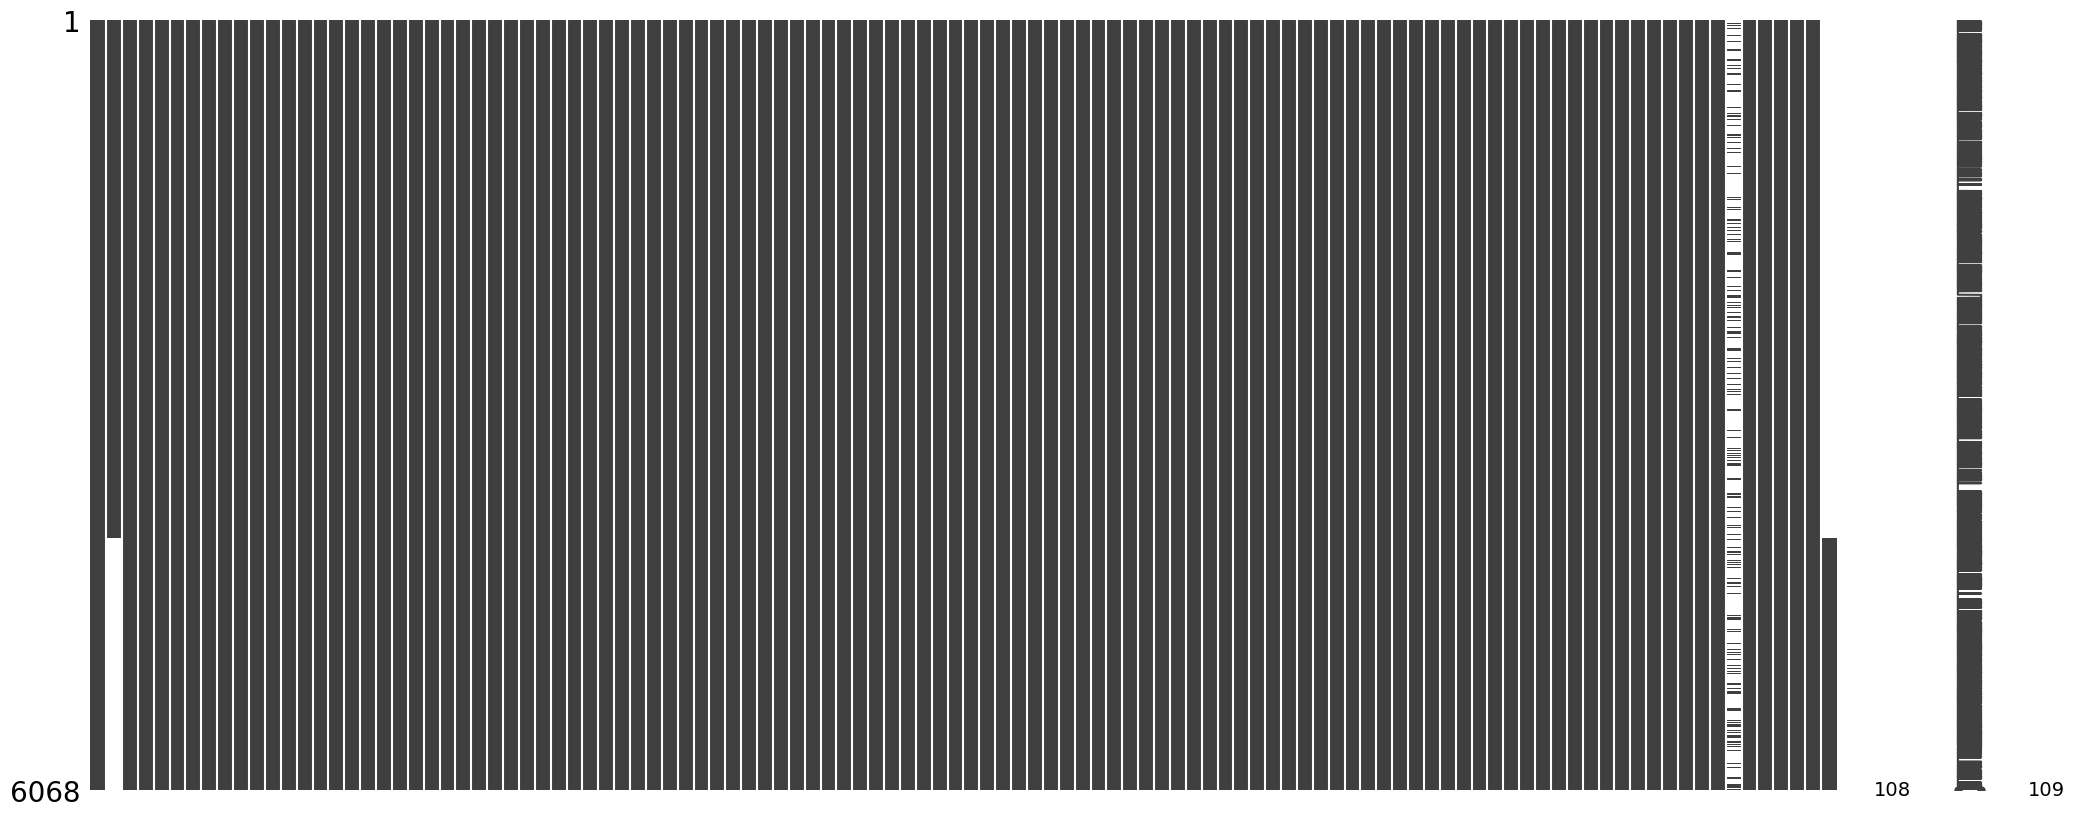

In [16]:
msno.matrix(df_2)

<Axes: >

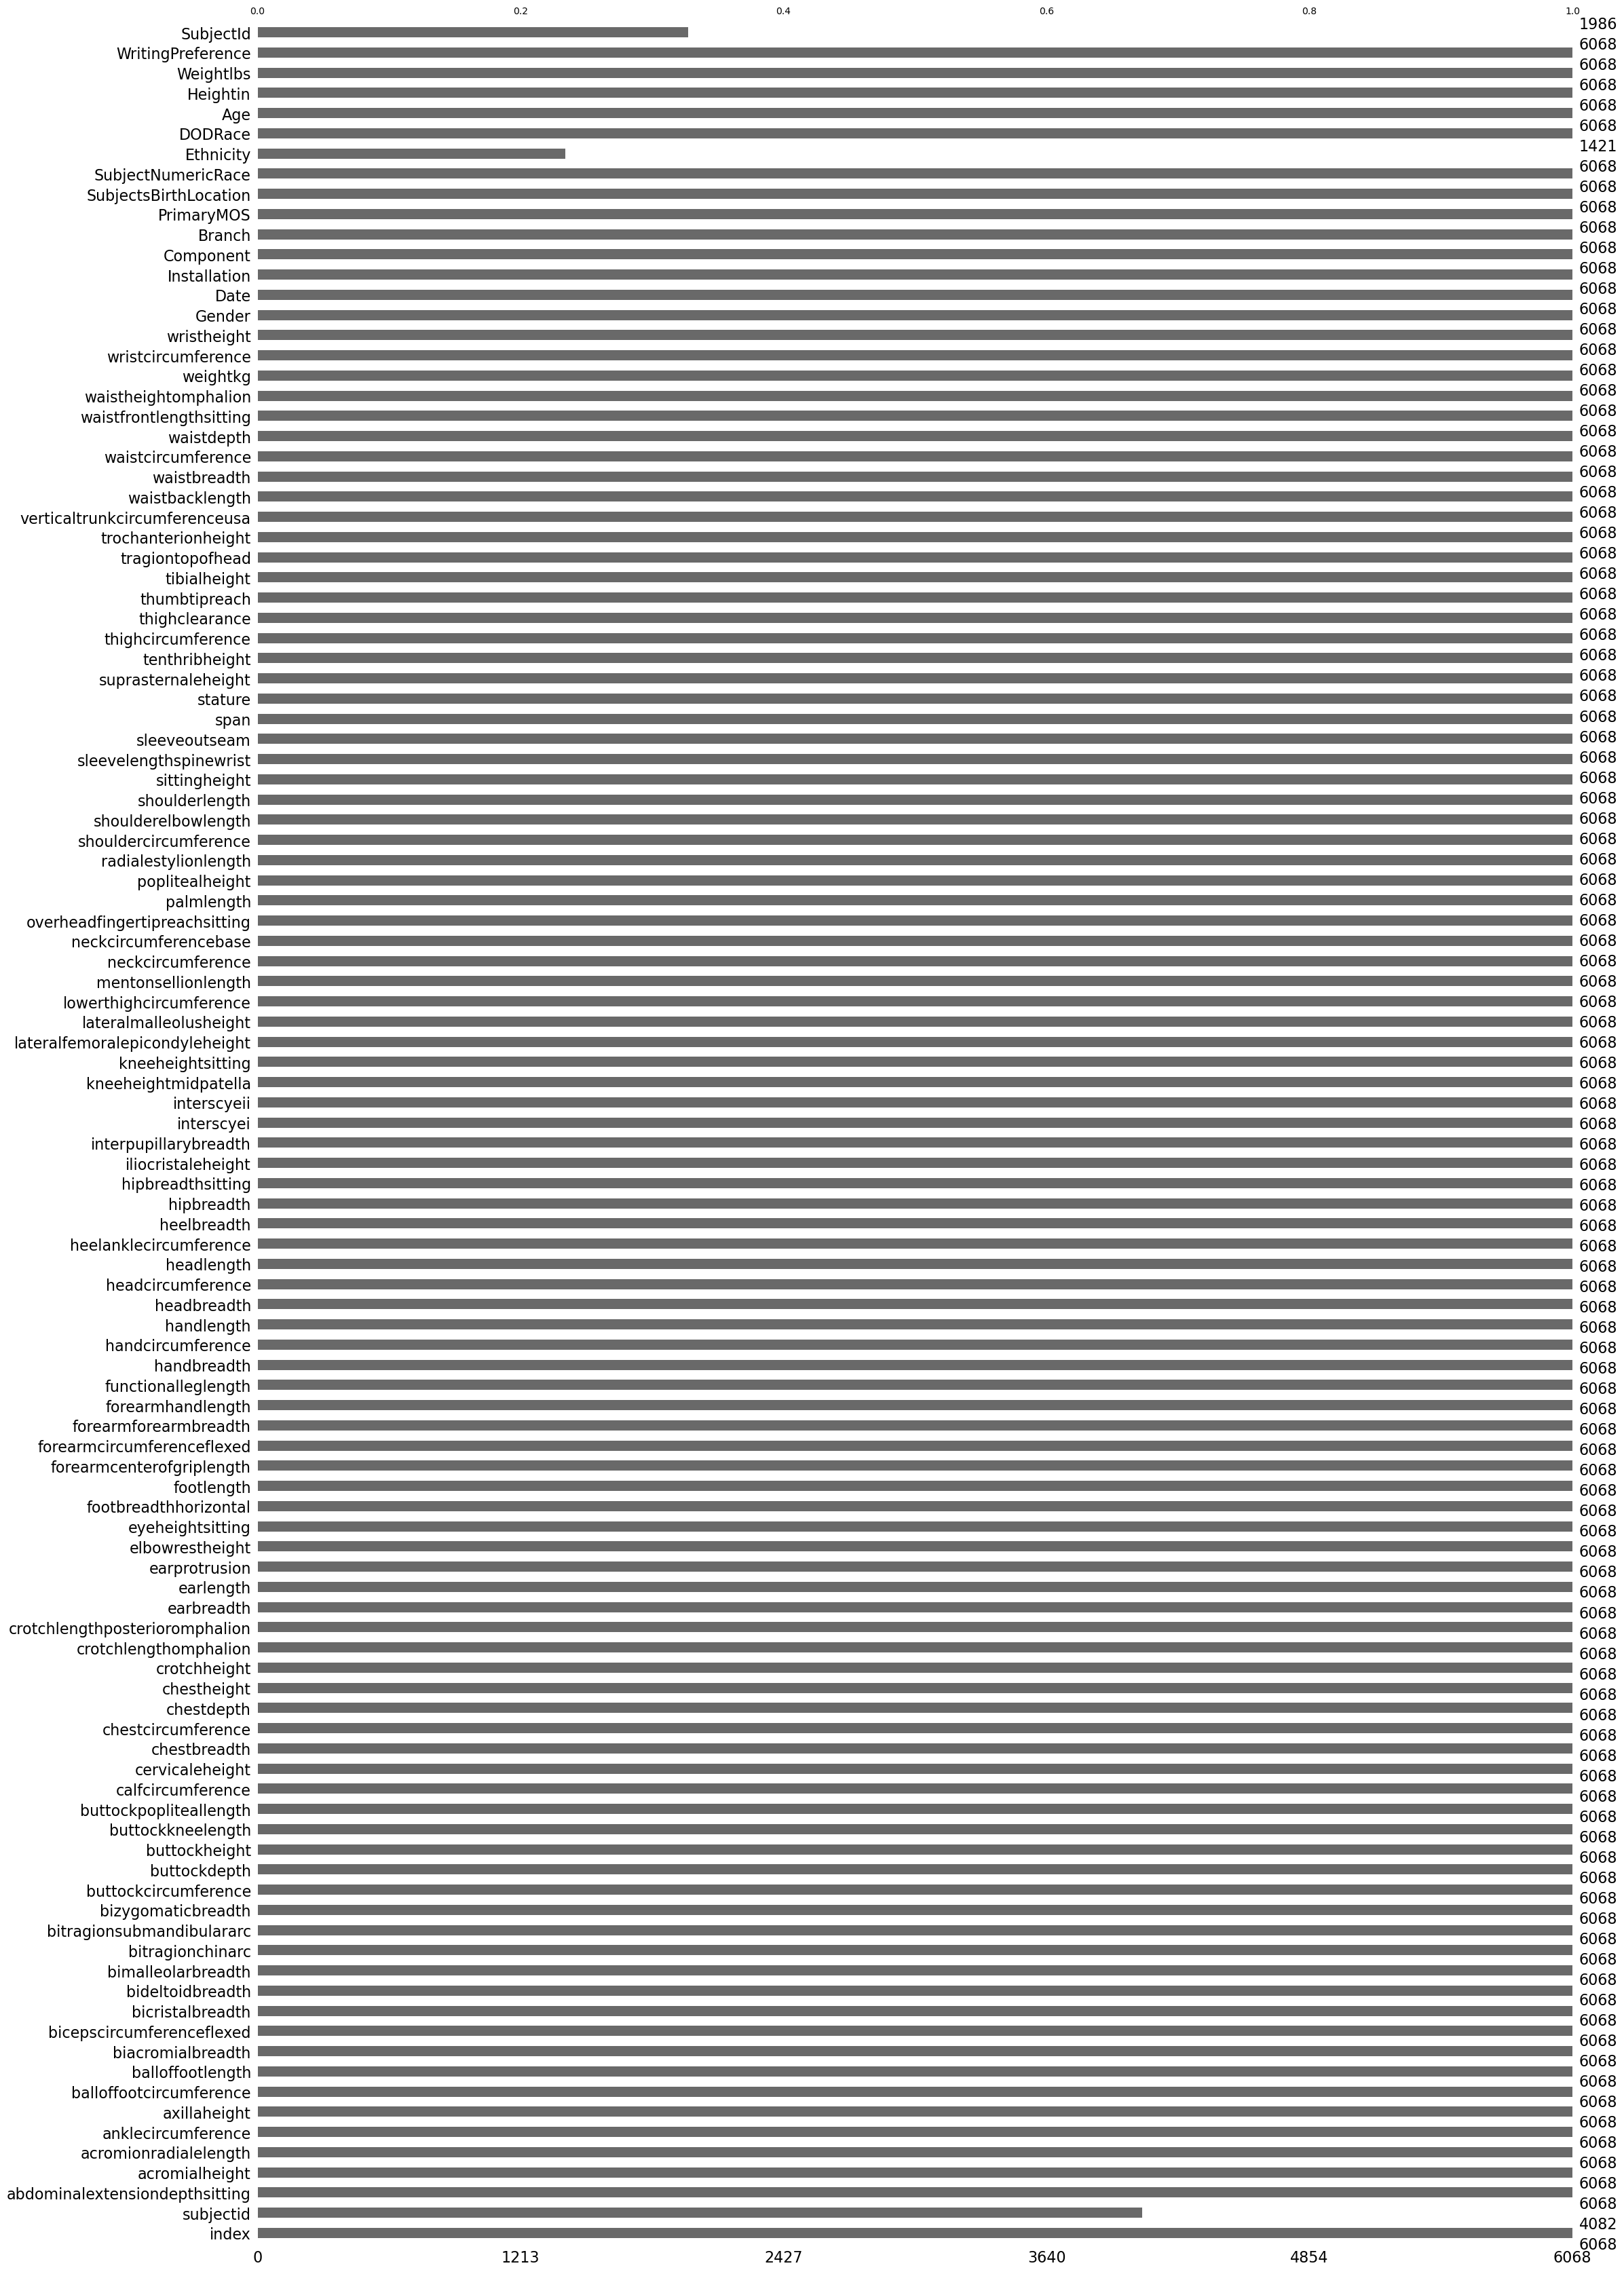

In [17]:
msno.bar(df_2)
#There is a lot of nan values on Ethnicity, SubjectId, Subjectid


<Axes: >

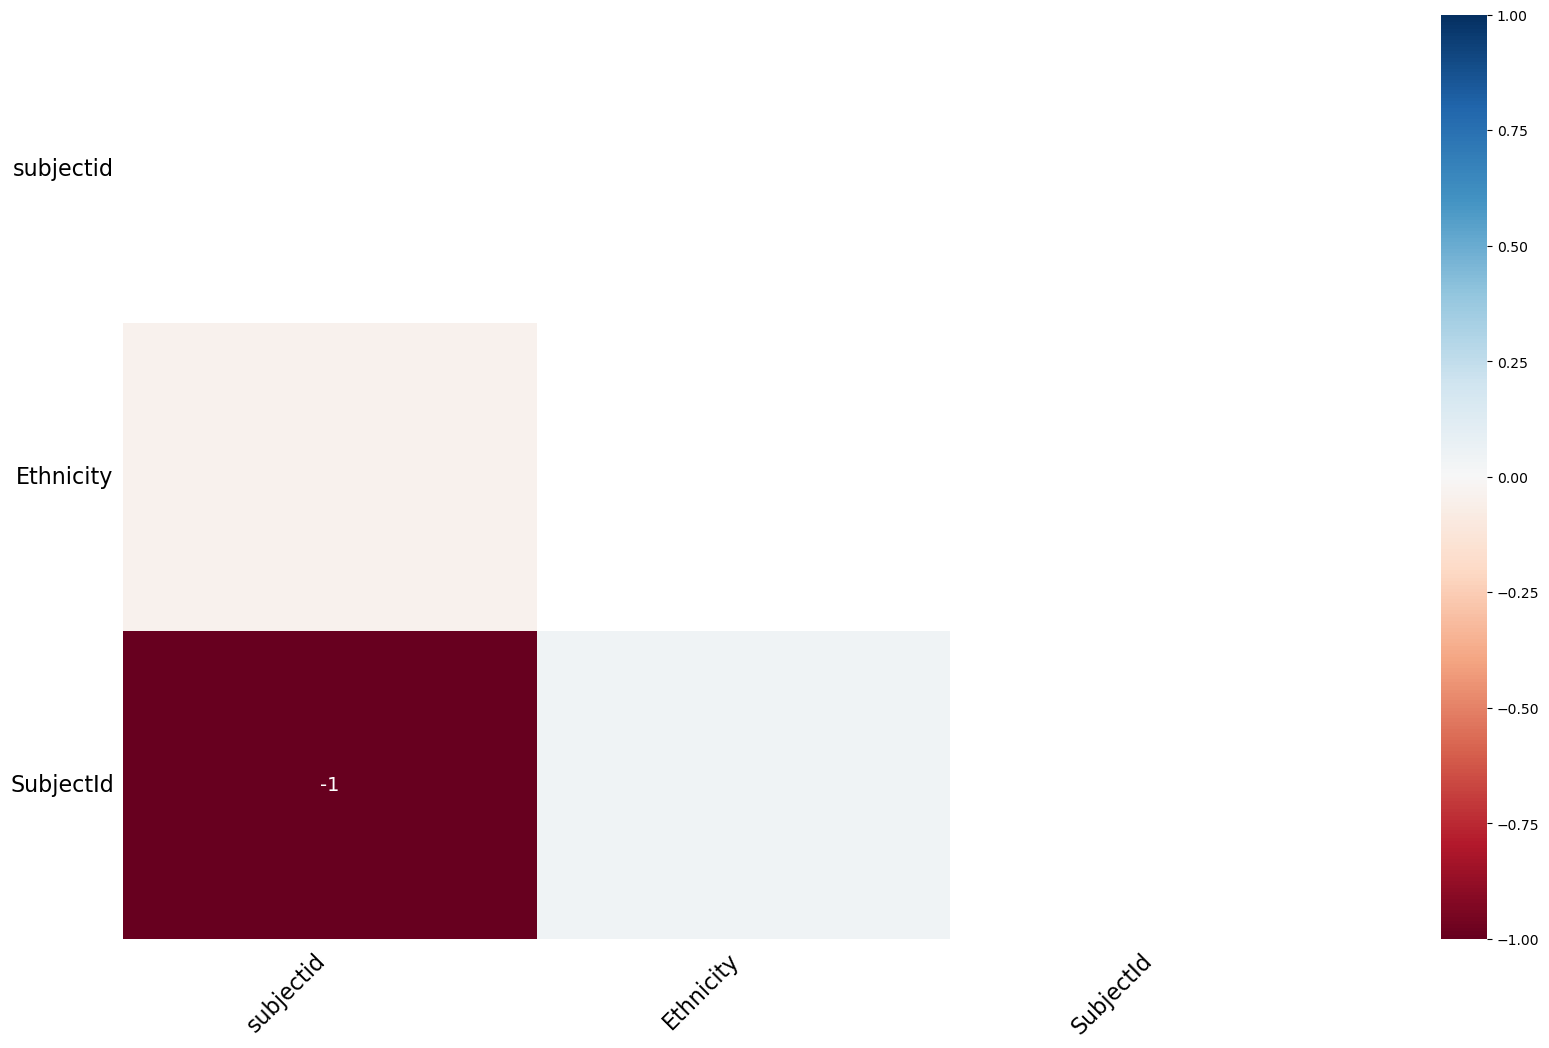

In [18]:
msno.heatmap(df_2)
#Here we can see the missing values

In [19]:
df_2['Component'].value_counts()

Component
Regular Army           3140
Army National Guard    2708
Army Reserve            220
Name: count, dtype: int64

In [20]:
df_2.columns

Index(['index', 'subjectid', 'abdominalextensiondepthsitting',
       'acromialheight', 'acromionradialelength', 'anklecircumference',
       'axillaheight', 'balloffootcircumference', 'balloffootlength',
       'biacromialbreadth',
       ...
       'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference', 'SubjectId'],
      dtype='object', length=110)

In [176]:
# pip install missingno

In [22]:
#Deleting unnecessary colums
#index is not a necessary column, so, i am dropping it.
#Ethnicity contains a lot of nan values, so this will affect the model, so i am gonna drop it too.
# PrimaryMOS – Primary Military Occupational Specialty, and i think this is not a necessary one too.
#Heightin – Height in aInches; self-reported, comparable to measured “stature, i will drop it because it is self_reported
# Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg, i will drop it because it is self_reported
#The others are not important, i will drop them.
#SubjectNumericRace is also contains self_reported data

df_2.drop(columns=['index','Ethnicity','Component', "subjectid",'PrimaryMOS', 'SubjectNumericRace',
                   'Heightin','Installation', 'Branch', 'Weightlbs', "SubjectId", "Date"],inplace=True)

In [23]:
df_2.shape
#The shape after deleting is 6068, 98

(6068, 98)

In [24]:
df_2.head()
#Printing the head of the new data

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  ...  waistfrontlengthsitting  waistheightomphalion  \
0               274  ...                      440                  1054   
1               257  ...                      371                  1054   
2               261  ...                      411                  1041   
3               262  ...                      399                   968   
4               263  ...                      379                  1245   

   weightkg  wristcircumference  wristheight  Gender  SubjectsBirthLocation  \
0       815                 175          853    Male           North Dakota   
1       726                 167          815    Male               New York   
2       929                 180          831    Male               New York   
3       794                 176          793    Male              Wisconsin   
4       946                 188          954    Male         North Carolina   

   DODRace  Age  WritingPreference  
0        1   41         Right hand  
1        1   35          Left hand  
2        2   42          Left hand  
3        1   31         Right hand  
4        2   21         Right hand  

[5 rows x 98 columns]

### Droping DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [25]:
df_2.DODRace.value_counts().head(10)
#Seeing the values of the target column

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [26]:
#As we can see from these values, we cannot benefit from the values under 500, and they are so low, and the 
#model cannot learn from it. so, i will drop them.
#Aqui, I am checking the unique value of it before dropping them
df_2.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

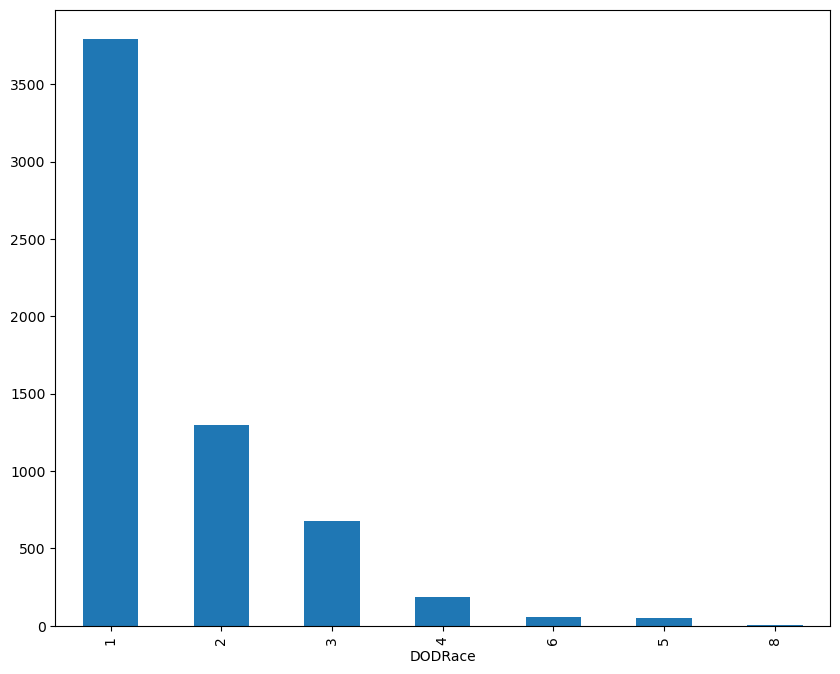

In [27]:
df_2["DODRace"].value_counts().plot(kind="bar")
plt.show()
#Aqui is the graph which shows the values of all classes, and it shows that the other values are complete low.

In [28]:
drop = df_2.DODRace.value_counts()[df_2.DODRace.value_counts() <= 500].index
#assigning the value under 500 to drop them in the next step

In [29]:
drop

Index([4, 6, 5, 8], dtype='int64', name='DODRace')

In [30]:
#Droping the values under 500 from our data
for i in drop:
    column_index = df_2[df_2['DODRace'] == i].index
    df_2.drop(column_index, inplace=True)
    
df_2.reset_index(drop=True, inplace=True)

In [31]:
df_2.DODRace.value_counts().head(10)
#Checking the target after deleting the values under 500

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [32]:
drop = df_2.DODRace.value_counts()[df_2.DODRace.value_counts() <= 500].index
drop

Index([], dtype='int64', name='DODRace')

In [33]:
df_2.shape
#The shape after deleting is 5769, 98

(5769, 98)

In [34]:
#Aqui, I am checking the values after dropping them, so i will continue with them only.
df_2.DODRace.unique()

array([1, 2, 3], dtype=int64)

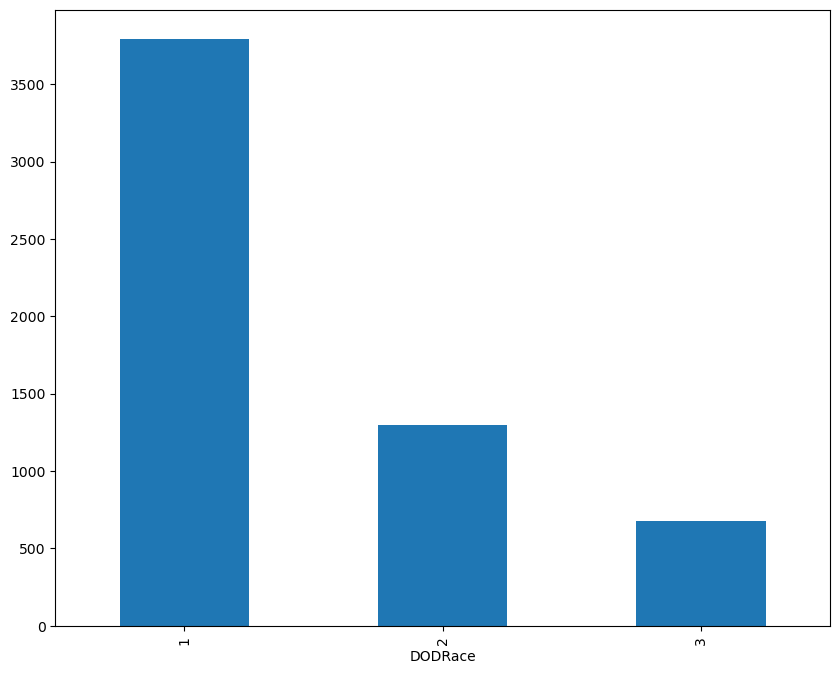

In [35]:
df_2["DODRace"].value_counts().plot(kind="bar")
plt.show()
#Aqui is the graph after dropping the other values. The Third one is less than the others, but still the model can
#benefits from it, not like the others which i have dropped.

In [36]:
df_2.corr(numeric_only=True)[(abs(df_2.corr(numeric_only=True)) >= 0.9) & (abs(df_2.corr(numeric_only=True)) < 1)].any().any()

#As we can see, there is multicolinuarity in the data, but i will keep them for now, and see the performance of the model first

True

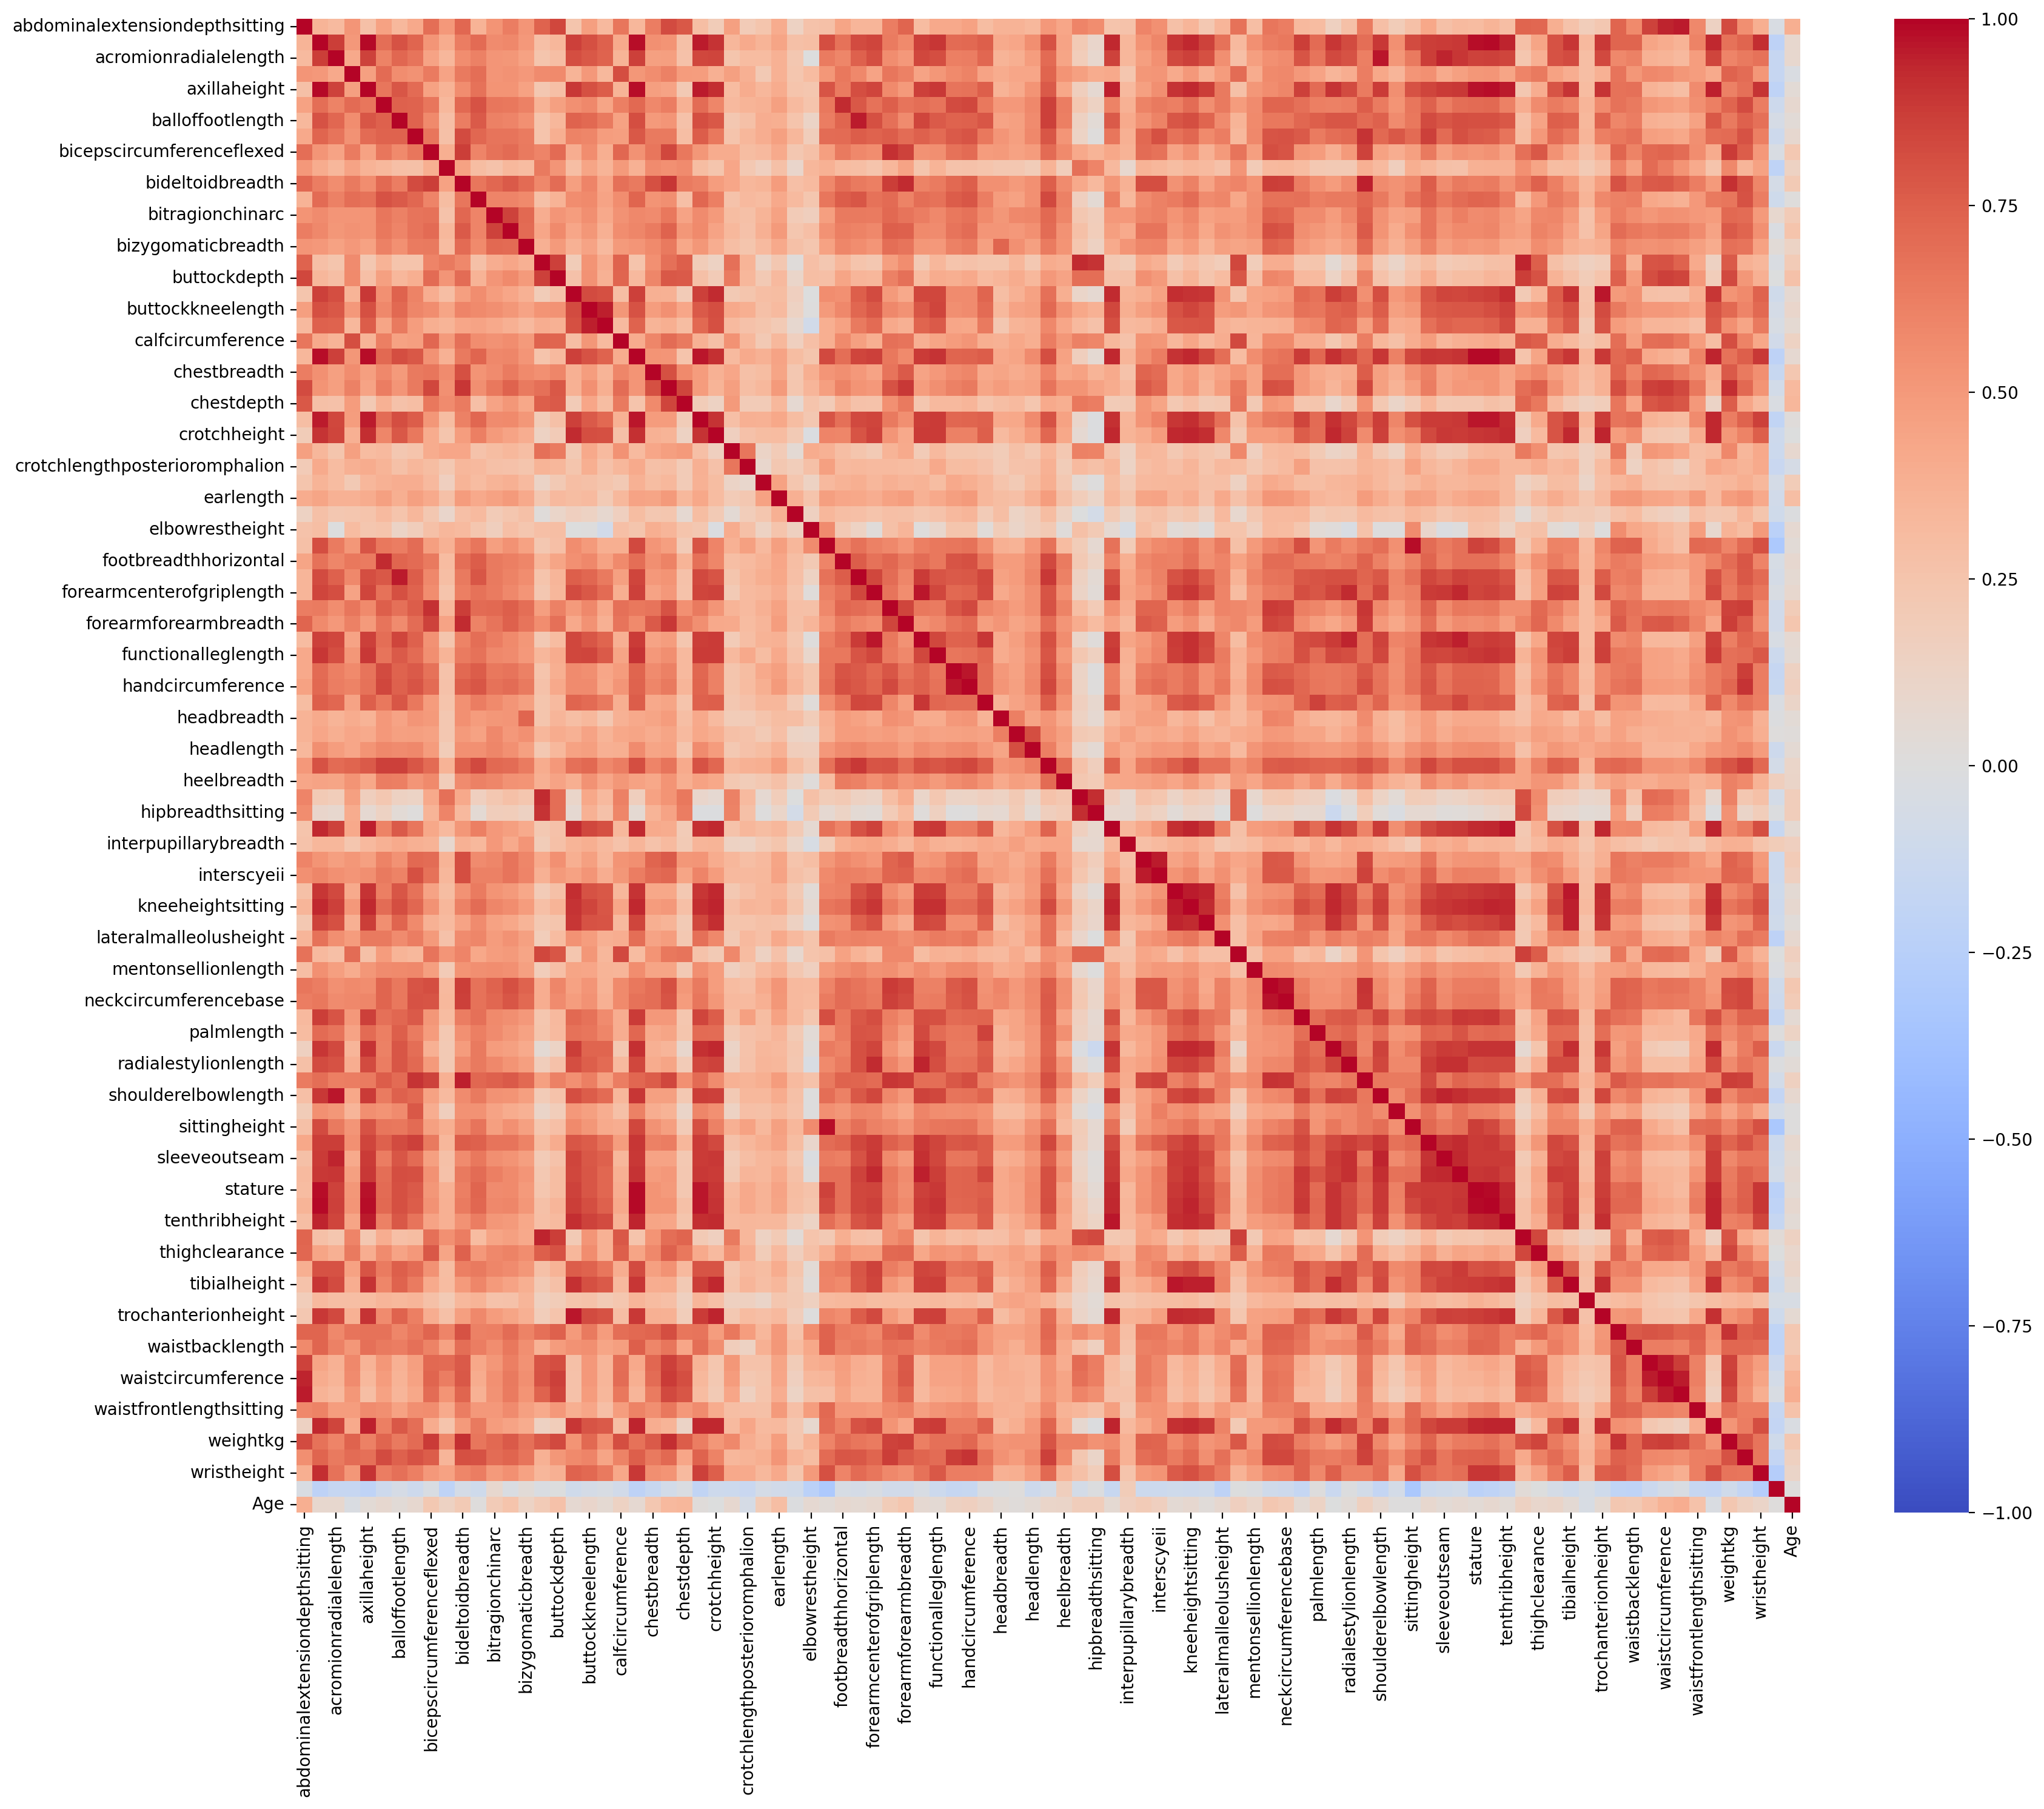

In [37]:
plt.figure(figsize=(20, 16), dpi=200)
sns.heatmap(df_2.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm');

In [38]:
df_2.corr(numeric_only=True)[(abs(df_2.corr(numeric_only=True)) >= 0.9) & (abs(df_2.corr(numeric_only=True)) < 1)].index

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [39]:
df_2.select_dtypes('O').head()
#Seeing the object columns

Gender SubjectsBirthLocation WritingPreference
0   Male          North Dakota        Right hand
1   Male              New York         Left hand
2   Male              New York         Left hand
3   Male             Wisconsin        Right hand
4   Male        North Carolina        Right hand

In [40]:
df_2.select_dtypes('O').columns
#Printing the object values

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [41]:
#Using OneHotEncoder to convert the object values to be able to work with them
objs = ['Gender', 'SubjectsBirthLocation','WritingPreference']

trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), objs),
                            remainder=MinMaxScaler(),verbose_feature_names_out=False)

trans = trans.set_output(transform="pandas")

In [42]:
df_2["DODRace"] = df_2.DODRace.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic"
    }
)

In [43]:
X = df_2.drop("DODRace", axis=1)
y = df_2.DODRace

In [44]:
y

0          White
1          White
2          Black
3          White
4          Black
          ...   
5764    Hispanic
5765    Hispanic
5766       Black
5767    Hispanic
5768    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [45]:
X.shape

(5769, 97)

In [46]:
y.shape

(5769,)

In [47]:
X.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  ...  waistdepth  waistfrontlengthsitting  \
0               274  ...         240                      440   
1               257  ...         225                      371   
2               261  ...         255                      411   
3               262  ...         205                      399   
4               263  ...         214                      379   

   waistheightomphalion  weightkg  wristcircumference  wristheight  Gender  \
0                  1054       815                 175          853    Male   
1                  1054       726                 167          815    Male   
2                  1041       929                 180          831    Male   
3                   968       794                 176          793    Male   
4                  1245       946                 188          954    Male   

   SubjectsBirthLocation  Age  WritingPreference  
0           North Dakota   41         Right hand  
1               New York   35          Left hand  
2               New York   42          Left hand  
3              Wisconsin   31         Right hand  
4         North Carolina   21         Right hand  

[5 rows x 97 columns]

In [48]:
y.head()

0    White
1    White
2    Black
3    White
4    Black
Name: DODRace, dtype: object

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [50]:
X_train.shape

(4615, 97)

In [51]:
X_test.shape

(1154, 97)

In [52]:
y_train.shape

(4615,)

In [53]:
y_test.shape

(1154,)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [54]:
#Here i will build the model with only random state and see the result
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic', LogisticRegression(random_state=101))])

In [55]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
#we can see that there is no overfitting

Test_Set
[[238   4  18]
 [  6  80  50]
 [ 11  17 730]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.79      0.59      0.68       136
       White       0.91      0.96      0.94       758

    accuracy                           0.91      1154
   macro avg       0.88      0.82      0.85      1154
weighted avg       0.90      0.91      0.90      1154


Train_Set
[[ 953   13   72]
 [  28  305  210]
 [  25   50 2959]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.83      0.56      0.67       543
       White       0.91      0.98      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.90      0.82      0.85      4615
weighted avg       0.91      0.91      0.91      4615



In [56]:
#Here i will build the model with class_weight and  random state and see the result
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [57]:
eval_metric(pipe_model2, X_train, y_train, X_test, y_test)
#we can see that there is no overfitting

Test_Set
[[240  13   7]
 [  4 111  21]
 [ 26  90 642]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.91       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  457   66]
 [  63  355 2616]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [58]:
#Here i will build the model with class_weight, max_iter and  random state and see the result
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        max_iter=1000, 
                                                                        random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=101))])

In [59]:
eval_metric(model, X_train, y_train, X_test, y_test)
#we can see that there is no overfitting
#Now we are getting better result

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [60]:
#Fore scoring of cross_validate, I should use make scorer for it
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

#For the operations, i will use the last one
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        max_iter=1000, 
                                                                        random_state=101))]

cv_model = Pipeline(steps=operations)
#With cross_validate, I should put return_train_score to see the scores later
scores = cross_validate(cv_model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1,11))

df_scores.mean()[2:]

#As we can see from the result, the best result we got it from recall, so I will use it for gridSearch

test_precision_Hispanic    0.490
train_precision_Hispanic   0.533
test_recall_Hispanic       0.773
train_recall_Hispanic      0.839
test_f1_Hispanic           0.599
train_f1_Hispanic          0.652
dtype: float64

In [61]:
cv_model.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'SubjectsBirthLocation',
                                     'WritingPreference'])],
                     verbose_feature_names_out=False)),
  ('logistic',
   LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'SubjectsBirthLocation',
                                   'WritingPreference'])],
                

### Logistic Model GridsearchCV

In [62]:
#As i said before, i will use recall Hispanic, as it has higher score, than the others. to so do, 
#i will use make scorer with it.
#The label should have a valud of Hispanic
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

param_grid = {
    "logistic__C": [0.5, 1], 
    "logistic__penalty": ["l1", "l2"],
    "logistic__solver": ["liblinear", "lbfgs", "saga"],
}

operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        max_iter=10000, 
                                                                        random_state=101))]

gr_model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator= gr_model, 
                          param_grid= param_grid, 
                          scoring=recall_Hispanic, 
                          cv=10, n_jobs=-1, 
                          return_train_score=True )


grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'lbfgs', 'saga']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [63]:
y_pred = grid_model.predict(X_test)
y_pred[:10]

array(['White', 'White', 'White', 'White', 'Hispanic', 'White', 'Black',
       'White', 'Hispanic', 'White'], dtype=object)

In [64]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)
#We can see from the results, there is no sign of overfitting.

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  57  362 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



In [65]:
#Now, i will see the best estimator for it 
grid_model.best_estimator_

#As we can see from the best estimator, the best C is 1, and it seems that the other params are not important

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [66]:
grid_model.best_params_

{'logistic__C': 1, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}

In [67]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.773
mean_train_score   0.839
Name: 10, dtype: object

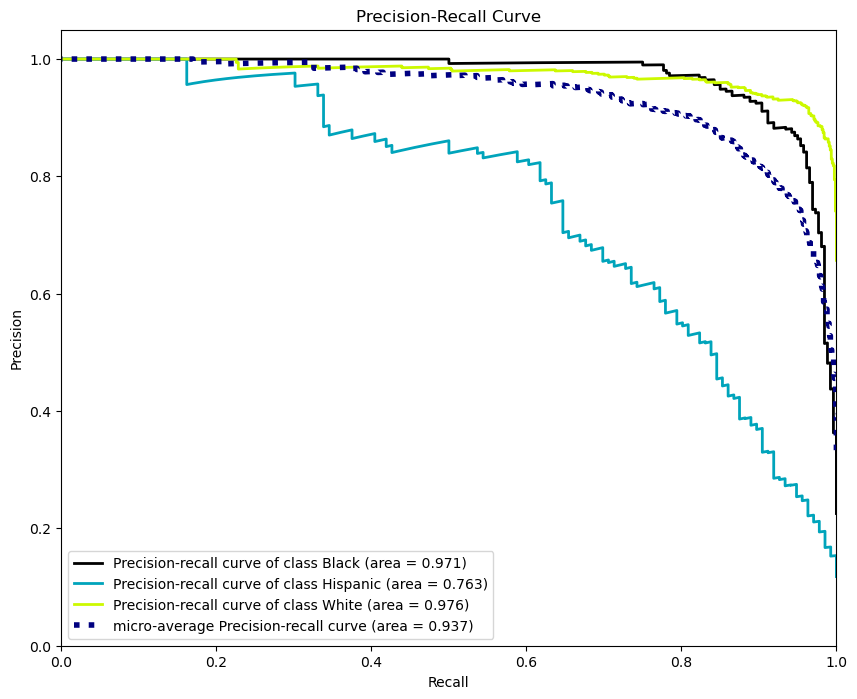

In [68]:
#Now, let's see the graph of it
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        C=1,
                                                                        penalty= 'l2', 
                                                                        solver='lbfgs',
                                                                        max_iter=10000, 
                                                                        random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

#As we can see from the graph, white class is higher than the others. And Hispanic is the less one

In [69]:
#Now, the scores of this model, should be saved to use it later for comparing them with the other models and see
#which one is better.
y_test_dum = pd.get_dummies(y_test).values

average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])

0.7628593977747096

In [70]:
print('The value of precision', average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1]))
print('The value of recall', recall_score(y_test, y_pred, average=None, labels=["Hispanic"]))
print('The value of f1', f1_score(y_test, y_pred, average=None, labels=["Hispanic"]))

#As we can see the score of recall is higher

The value of precision 0.7628593977747096
The value of recall [0.81617647]
The value of f1 [0.63428571]


In [71]:
#To be able to use these values later on, I will assign them to values, to make it easy 
logistic_pre = average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])
logistic_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
logistic_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model

In [72]:
#Here i will build the model with only random state and see the result
operations = [('OneHotEncoder', trans), ('svc', SVC(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(random_state=101))])

In [73]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)
#There is no overfitting

Test_Set
[[229   0  31]
 [  4  41  91]
 [  7   1 750]]
              precision    recall  f1-score   support

       Black       0.95      0.88      0.92       260
    Hispanic       0.98      0.30      0.46       136
       White       0.86      0.99      0.92       758

    accuracy                           0.88      1154
   macro avg       0.93      0.72      0.77      1154
weighted avg       0.89      0.88      0.87      1154


Train_Set
[[ 923    3  112]
 [  38  139  366]
 [  15    5 3014]]
              precision    recall  f1-score   support

       Black       0.95      0.89      0.92      1038
    Hispanic       0.95      0.26      0.40       543
       White       0.86      0.99      0.92      3034

    accuracy                           0.88      4615
   macro avg       0.92      0.71      0.75      4615
weighted avg       0.89      0.88      0.86      4615



In [74]:
operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(class_weight='balanced', random_state=101))])

In [75]:
eval_metric(pipe_model2, X_train, y_train, X_test, y_test)
#There is no overfitting
#The results for Hispanic in the recall now is better

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [76]:
#Now, the cross_validate part
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

cv_model = Pipeline(steps=operations)

scores = cross_validate(cv_model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

#As we can see from the scores, the recall scores is better

test_precision_Hispanic    0.451
train_precision_Hispanic   0.495
test_recall_Hispanic       0.760
train_recall_Hispanic      0.835
test_f1_Hispanic           0.565
train_f1_Hispanic          0.622
dtype: float64

In [77]:
pipe_model2.get_params()

{'memory': None,
 'steps': [('OneHotEncoder',
   ColumnTransformer(remainder=MinMaxScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender', 'SubjectsBirthLocation',
                                     'WritingPreference'])],
                     verbose_feature_names_out=False)),
  ('svc', SVC(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OneHotEncoder': ColumnTransformer(remainder=MinMaxScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['Gender', 'SubjectsBirthLocation',
                                   'WritingPreference'])],
                   verbose_feature_names_out=False),
 

###  SVC Model GridsearchCV

In [78]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

gr_model = Pipeline(steps=operations)

grid_model_svc = GridSearchCV(estimator=gr_model, param_grid= param_grid,scoring=recall_Hispanic,cv=10,n_jobs=-1,return_train_score=True,)

grid_model_svc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [79]:
y_pred = grid_model_svc.predict(X_test)
y_pred[:10]

array(['White', 'White', 'Hispanic', 'White', 'Hispanic', 'White',
       'Black', 'White', 'Hispanic', 'White'], dtype=object)

In [80]:
eval_metric(grid_model_svc, X_train, y_train, X_test, y_test)
#No overfitting as well

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [81]:
grid_model_svc.best_estimator_
#As we can see the best C is 1 and it also ignored the others.

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=1, class_weight='balanced', random_state=101))])

In [82]:
pd.DataFrame(grid_model_svc.cv_results_).loc[
    grid_model_svc.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.760
mean_train_score   0.835
Name: 3, dtype: object

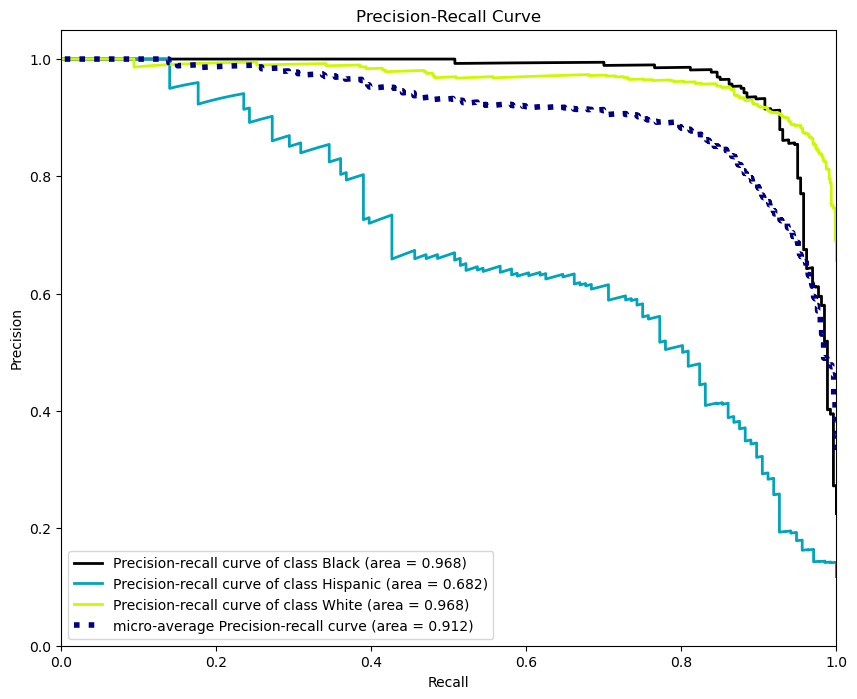

In [83]:
#Now, let's see the graph of it
operations = [('OneHotEncoder', trans), ('svc', SVC(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)
#Here we cannot use predict_proba

plot_precision_recall(y_test, decision_function)
plt.show();
#As we can see from the graph, black class is higher but it is nearly the same as the white class. 
#And Hispanic is the less one

In [84]:
y_test_dum = pd.get_dummies(y_test).values

average_precision_score(y_test_dum[:, 1], decision_function[:, 1])

#The value here is less than logistic

0.6822405823886313

In [85]:
#To be able to use these values later on, I will assign them to values, to make it easy 
svc_pre = average_precision_score(y_test_dum[:, 1], decision_function[:, 1])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [86]:
print('Precision', svc_pre)
print('Recall', svc_recall)
print('f1', svc_f1)
#As we can see the recall score is higher

Precision 0.6822405823886313
Recall [0.81617647]
f1 [0.60326087]


## 3. RF

### Vanilla RF Model

In [87]:
#One of the thing that we have look at it is that, once we get to the family of trees, we cannot use OneHotEncoder.
#Instide, we should use OrdinalEncoder.

objs = ['Gender', 'SubjectsBirthLocation','WritingPreference'] #I put this here again, just to reminds me of its name.

trans_ord = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), objs),
                            remainder="passthrough", verbose_feature_names_out=False)

trans_ord = trans_ord.set_output(transform="pandas")

In [88]:
#Ahora, I will build the model with only random state.

operations = [('OrdinalEncoder', trans_ord), ('RF', RandomForestClassifier(random_state=101))]

rf_pipe_model = Pipeline(steps=operations)

rf_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF', RandomForestClassifier(random_state=101))])

In [89]:
eval_metric(rf_pipe_model, X_train, y_train, X_test, y_test)
#All the signs say that there is overfitting, bad news. And the Hispanic is so bad.
#So, i will try with balanced and see the results.

Test_Set
[[204   0  56]
 [ 12   9 115]
 [ 15   5 738]]
              precision    recall  f1-score   support

       Black       0.88      0.78      0.83       260
    Hispanic       0.64      0.07      0.12       136
       White       0.81      0.97      0.89       758

    accuracy                           0.82      1154
   macro avg       0.78      0.61      0.61      1154
weighted avg       0.81      0.82      0.78      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [90]:
operations = [('OrdinalEncoder', trans_ord), ('RF', RandomForestClassifier(class_weight="balanced", random_state=101))]

rf_pipe_model = Pipeline(steps=operations)

rf_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [91]:
eval_metric(rf_pipe_model, X_train, y_train, X_test, y_test)
#The result changed in the precision 
#I will try cross validate und see the results.

Test_Set
[[191   0  69]
 [ 10   6 120]
 [ 10   2 746]]
              precision    recall  f1-score   support

       Black       0.91      0.73      0.81       260
    Hispanic       0.75      0.04      0.08       136
       White       0.80      0.98      0.88       758

    accuracy                           0.82      1154
   macro avg       0.82      0.59      0.59      1154
weighted avg       0.82      0.82      0.77      1154


Train_Set
[[1038    0    0]
 [   0  542    1]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [92]:
f1_hispanic = make_scorer(f1_score, average=None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average=None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score,  average=None, labels =["Hispanic"])
 

scoring = {"f1_hispanic":f1_hispanic, 
           "precision_hispanic":precision_hispanic,
           "recall_hispanic":recall_hispanic}


operations = [('OrdinalEncoder', trans_ord), ('RF', RandomForestClassifier(class_weight="balanced", random_state=101))]

rf_cv_model = Pipeline(steps=operations)

scores = cross_validate(rf_cv_model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]
#Still the result is not good

test_f1_hispanic           0.052
train_f1_hispanic          1.000
test_precision_hispanic    0.653
train_precision_hispanic   1.000
test_recall_hispanic       0.028
train_recall_hispanic      1.000
dtype: float64

In [93]:
rf_pipe_model.get_params()

{'memory': None,
 'steps': [('OrdinalEncoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('ordinalencoder',
                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                   unknown_value=-1),
                                    ['Gender', 'SubjectsBirthLocation',
                                     'WritingPreference'])],
                     verbose_feature_names_out=False)),
  ('RF', RandomForestClassifier(class_weight='balanced', random_state=101))],
 'verbose': False,
 'OrdinalEncoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('ordinalencoder',
                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                 unknown_value=-1),
                                  ['Gender', 'SubjectsBirthLocation',
                                   'WritingPreference'])],
              

### RF Model GridsearchCV

In [94]:
param_grid = {"RF__n_estimators": [400, 600],
                "RF__max_depth": [3, 4],
             }

operations = [('OrdinalEncoder', trans_ord), ('RF', RandomForestClassifier(class_weight="balanced", random_state=101))]

rf_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rf_model, 
                             param_grid=param_grid, 
                             scoring= recall_hispanic, 
                             n_jobs=-1, verbose=2,
                             return_train_score=True
                            )

rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('RF',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF__max_depth': [3, 4],
                         'RF__n_estimators': [400, 600]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [95]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[195  39  26]
 [ 17  77  42]
 [ 89 242 427]]
              precision    recall  f1-score   support

       Black       0.65      0.75      0.70       260
    Hispanic       0.22      0.57      0.31       136
       White       0.86      0.56      0.68       758

    accuracy                           0.61      1154
   macro avg       0.58      0.63      0.56      1154
weighted avg       0.74      0.61      0.64      1154


Train_Set
[[ 791  150   97]
 [  50  354  139]
 [ 245 1064 1725]]
              precision    recall  f1-score   support

       Black       0.73      0.76      0.74      1038
    Hispanic       0.23      0.65      0.34       543
       White       0.88      0.57      0.69      3034

    accuracy                           0.62      4615
   macro avg       0.61      0.66      0.59      4615
weighted avg       0.77      0.62      0.66      4615



In [96]:
y_pred = rf_grid_model.predict(X_test)

In [97]:
#Now, let's see the best estimators
rf_grid_model.best_estimator_
#As we can see 

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('RF',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=600, random_state=101))])

In [98]:
rf_grid_model.best_params_

{'RF__max_depth': 3, 'RF__n_estimators': 600}

In [99]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.611
mean_train_score   0.665
Name: 1, dtype: object

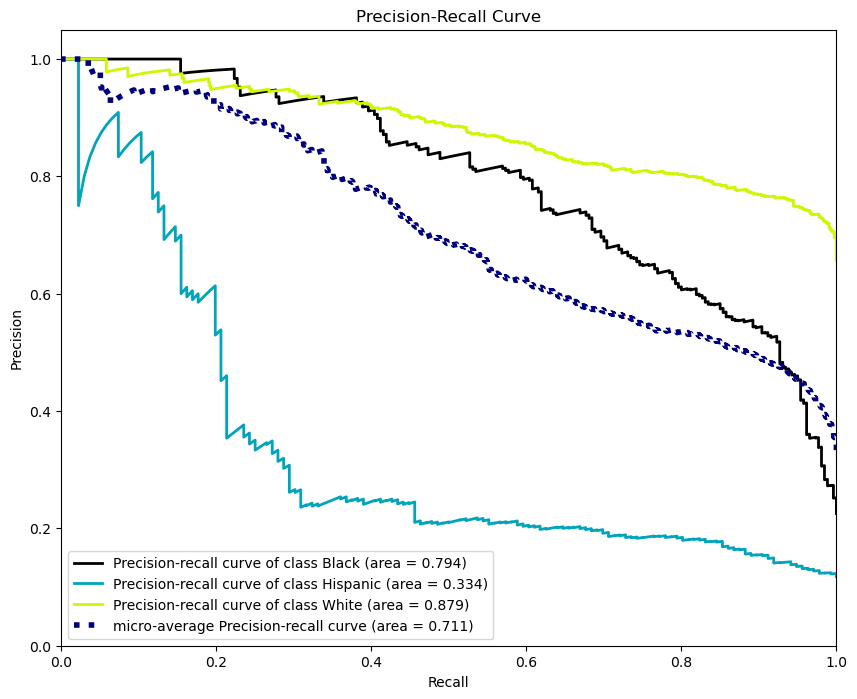

In [100]:
operations = [('OrdinalEncoder', trans_ord), ('RF', RandomForestClassifier(class_weight="balanced", 
                                                                           max_depth=3,
                                                                           max_features= 10,
                                                                           n_estimators=600,
                                                                           random_state=101))]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [101]:
y_test_dum = pd.get_dummies(y_test).values

average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])


0.33374395508295934

In [102]:
rf_pre = average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [103]:
print('Precision', rf_pre)
print('Recall', rf_recall)
print('f1', rf_f1)

Precision 0.33374395508295934
Recall [0.56617647]
f1 [0.31174089]


In [104]:
features = model["OrdinalEncoder"].get_feature_names_out()
features

array(['Gender', 'SubjectsBirthLocation', 'WritingPreference',
       'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc',
       'bitragionsubmandibulararc', 'bizygomaticbreadth',
       'buttockcircumference', 'buttockdepth', 'buttockheight',
       'buttockkneelength', 'buttockpopliteallength', 'calfcircumference',
       'cervicaleheight', 'chestbreadth', 'chestcircumference',
       'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbread

In [105]:
rf_feature_imp = pd.DataFrame(data=model["RF"].feature_importances_,
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

Feature Importance
elbowrestheight                              0.110
sittingheight                                0.083
eyeheightsitting                             0.080
buttockpopliteallength                       0.058
buttockkneelength                            0.057
...                                            ...
earbreadth                                   0.000
crotchlengthposterioromphalion               0.000
shoulderlength                               0.000
WritingPreference                            0.000
heelanklecircumference                       0.000

[97 rows x 1 columns]

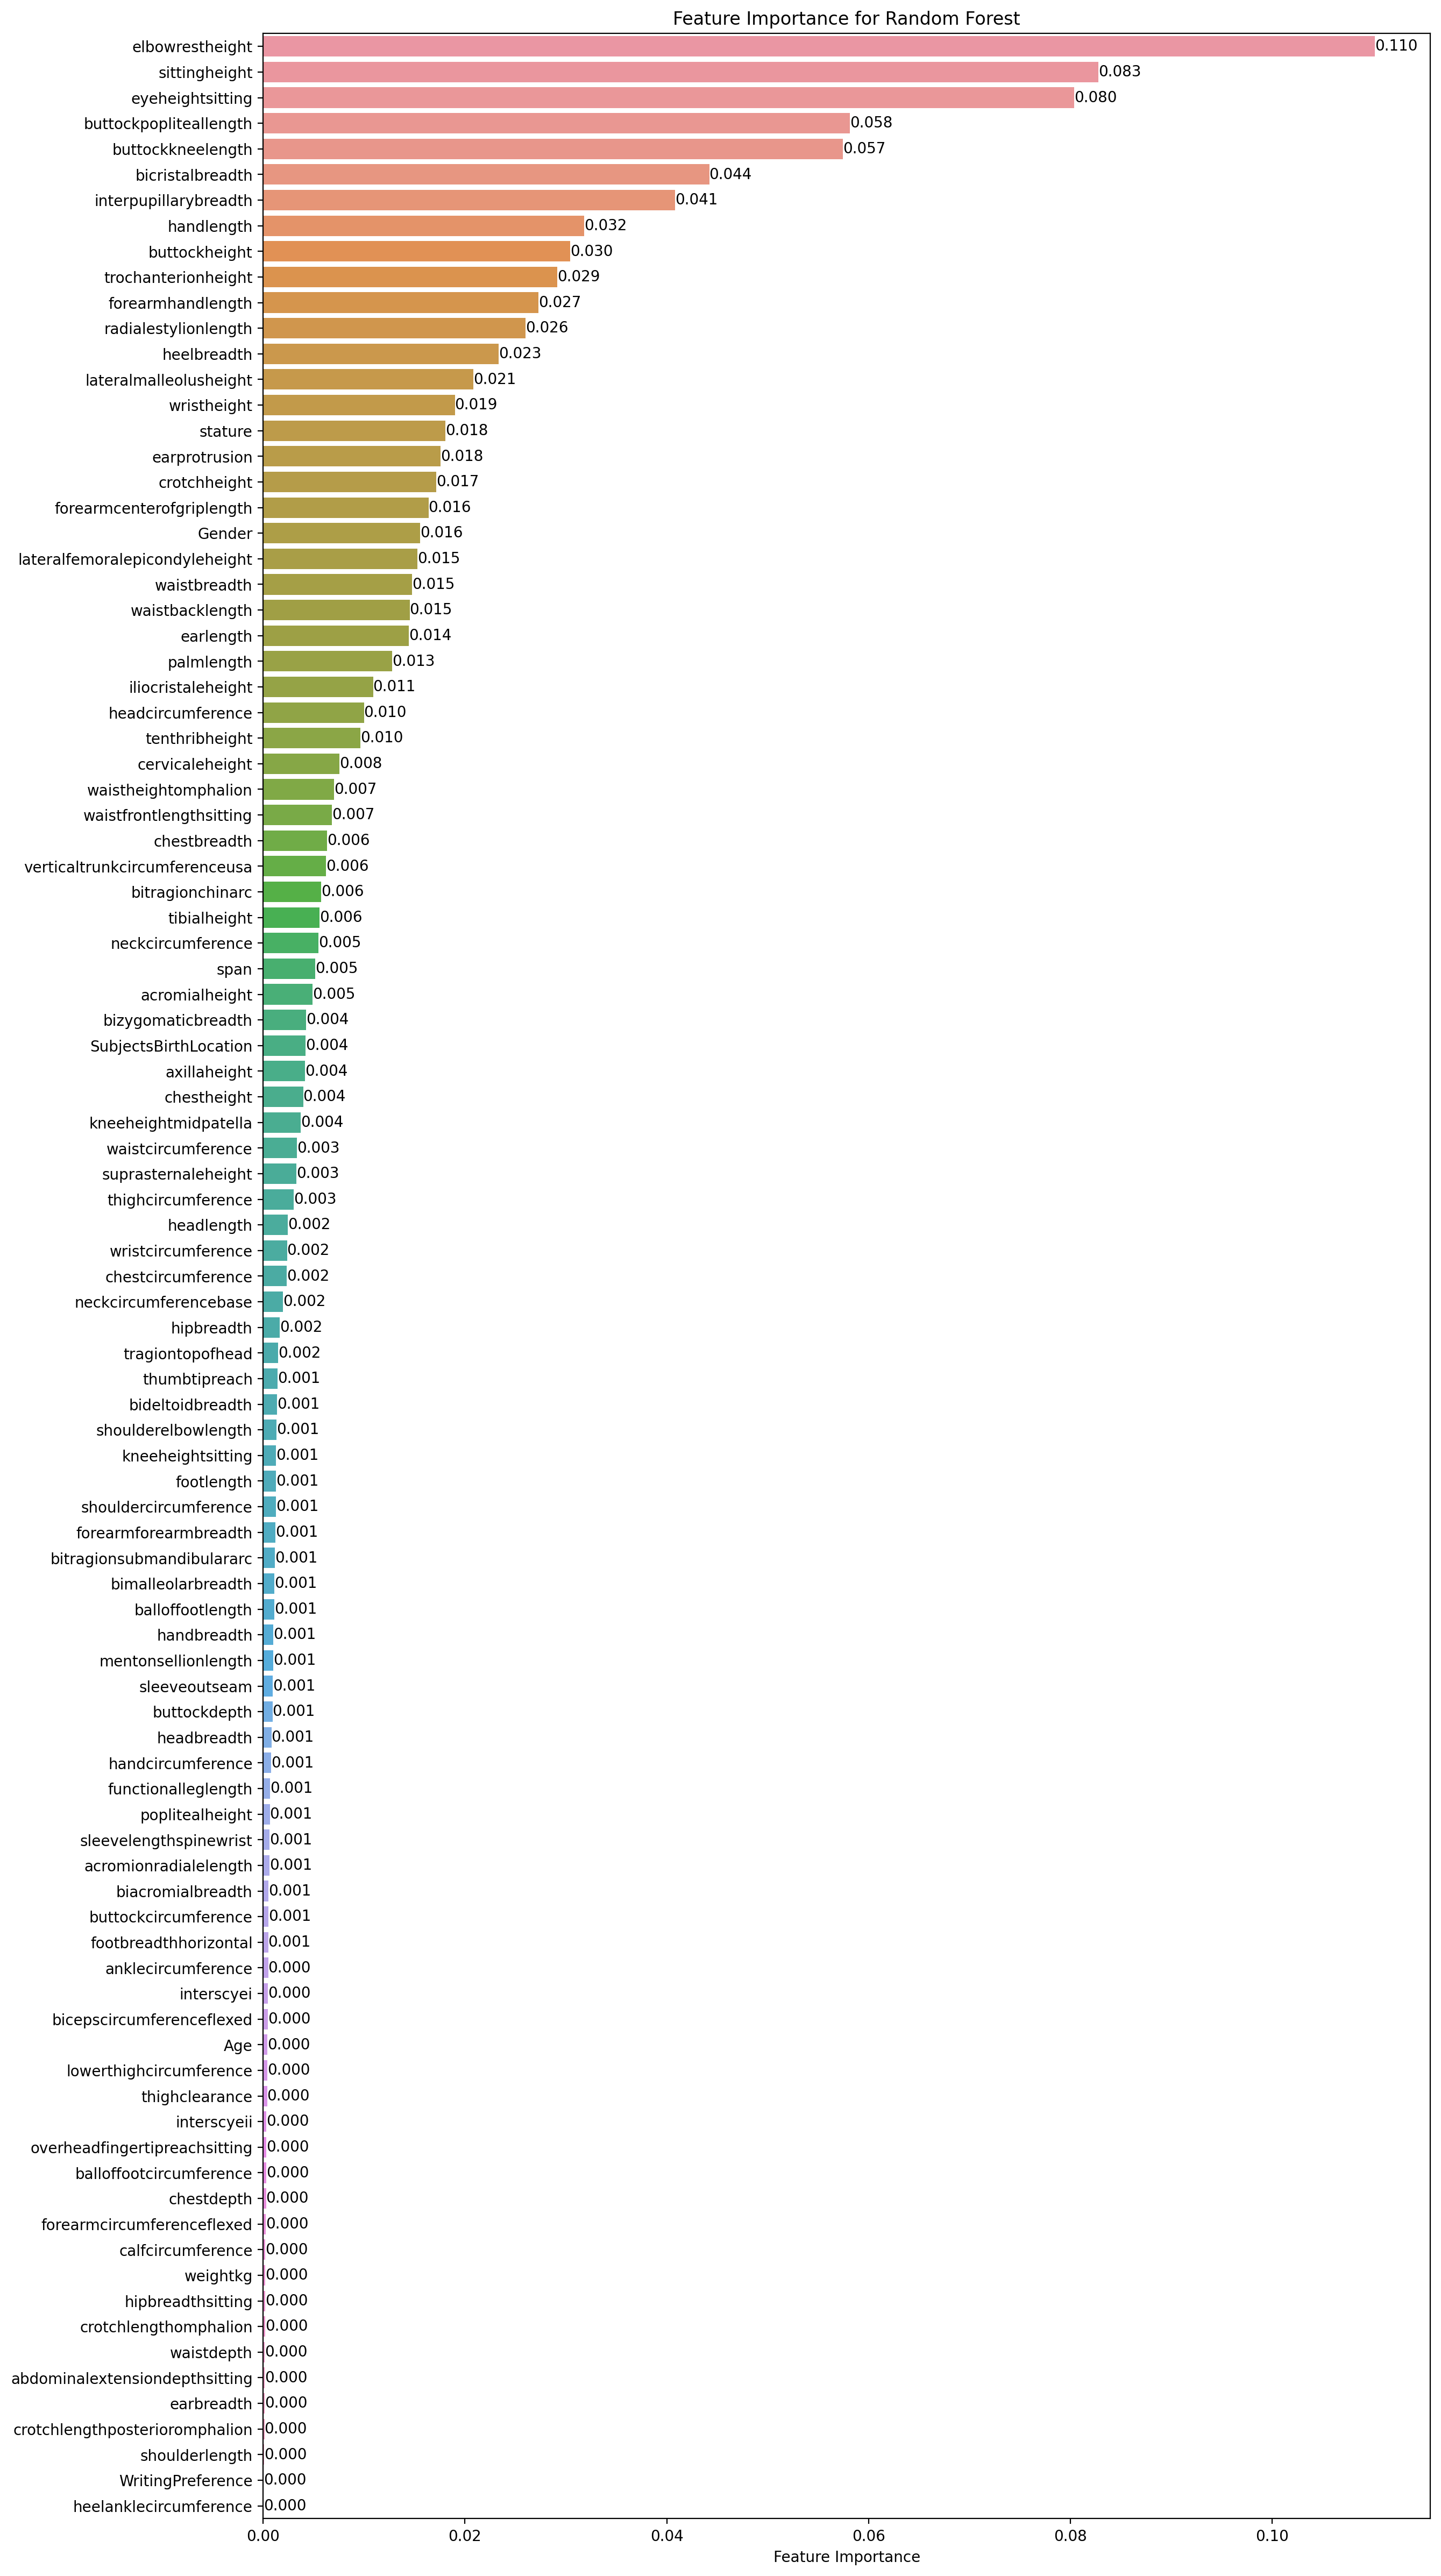

In [106]:
plt.figure(figsize=(14, 30), dpi=200)
ax = sns.barplot(x=rf_feature_imp["Feature Importance"],
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

## 4. XGBoost

### Vanilla XGBoost Model

In [107]:
objs = ['Gender', 'SubjectsBirthLocation','WritingPreference'] #I put this here again, just to reminds me of its name.

trans_ord = make_column_transformer(
                        (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), objs),
                            remainder="passthrough", verbose_feature_names_out=False)

trans_ord = trans_ord.set_output(transform="pandas")

In [108]:
# conda install -c conda-forge py-xgboost

In [109]:
# pip install xgboost

In [110]:
# from xgboost import XGBClassifier

In [111]:
df_2_copy = df_2.copy()
df_2_copy["DODRace"] = df_2_copy.DODRace.map(
    {
        "White": 0,
        "Black": 1,
        "Hispanic": 2,
    }
)
#Here i have to convert the target to 0, 1, 2, as the xg works with them. but if i did not do it, it will give me an error

In [112]:
df_2_copy.DODRace

0       0
1       0
2       1
3       0
4       1
       ..
5764    2
5765    2
5766    1
5767    2
5768    2
Name: DODRace, Length: 5769, dtype: int64

In [113]:
df_2.DODRace

0          White
1          White
2          Black
3          White
4          Black
          ...   
5764    Hispanic
5765    Hispanic
5766       Black
5767    Hispanic
5768    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [114]:
X = df_2_copy.drop(["DODRace"], axis=1)
y = df_2_copy["DODRace"]

X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [115]:
y_train

893     Hispanic
196        White
3821       White
3206       White
4500       Black
          ...   
4549    Hispanic
1487       White
3812       White
4435       Black
1748       White
Name: DODRace, Length: 4615, dtype: object

In [116]:
y_test

2019       White
4046       White
5563       White
3806       White
653     Hispanic
          ...   
2536       White
905        White
4429       White
5286       White
3836    Hispanic
Name: DODRace, Length: 1154, dtype: object

In [117]:
y_train_xg

1525    0
3111    0
3869    0
4666    1
3124    0
       ..
1388    0
3358    1
4501    1
5653    0
4921    1
Name: DODRace, Length: 4615, dtype: int64

In [118]:
y_test_xg

3588    0
3078    0
3625    2
5125    0
3360    0
       ..
4192    0
5205    1
2218    1
773     0
723     0
Name: DODRace, Length: 1154, dtype: int64

In [119]:
operations = [('OrdinalEncoder', trans_ord), ('xgboost', XGBClassifier(random_state=101))]

xg_pipe_model = Pipeline(steps=operations)

xg_pipe_model.fit(X_train_xg, y_train_xg)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [120]:
eval_metric(xg_pipe_model, X_train_xg, y_train_xg, X_test_xg, y_test_xg)

Test_Set
[[734  15   9]
 [ 33 226   1]
 [ 73  12  51]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       758
           1       0.89      0.87      0.88       260
           2       0.84      0.38      0.52       136

    accuracy                           0.88      1154
   macro avg       0.87      0.74      0.77      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [121]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xg
)

my_dict = {"weights": classes_weights, "label": y_train_xg}

comp = pd.DataFrame(my_dict)

comp.groupby("label").value_counts()

label  weights
0      0.507      3034
1      1.482      1038
2      2.833       543
Name: count, dtype: int64

In [122]:
xg_pipe_model.fit(X_train_xg, y_train_xg, xgboost__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [123]:
eval_metric(xg_pipe_model, X_train_xg, y_train_xg, X_test_xg, y_test_xg)

Test_Set
[[719  16  23]
 [ 24 230   6]
 [ 63  13  60]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       758
           1       0.89      0.88      0.89       260
           2       0.67      0.44      0.53       136

    accuracy                           0.87      1154
   macro avg       0.82      0.76      0.78      1154
weighted avg       0.87      0.87      0.87      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [124]:
# 'white':2, 'black':0, 'hispanic': 1
f1_hispanic = make_scorer(f1_score, average=None, labels=[1])
precision_hispanic = make_scorer(precision_score, average=None, labels=[1])
recall_hispanic = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_hispanic": f1_hispanic,
    "precision_hispanic": precision_hispanic,
    "recall_hispanic": recall_hispanic,
}


operations = [('OrdinalEncoder', trans_ord), ('xgboost', XGBClassifier(random_state=101))]

xg_model = Pipeline(steps=operations)


scores = cross_validate(
    xg_model,
    X_train_xg,
    y_train_xg,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
   )

df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic           0.873
train_f1_hispanic          1.000
test_precision_hispanic    0.906
train_precision_hispanic   1.000
test_recall_hispanic       0.843
train_recall_hispanic      1.000
dtype: float64

### XGBoost Model GridsearchCV

In [125]:
param_grid = {
    "xgboost__n_estimators": [20, 30, 40],
    "xgboost__max_depth": [1, 2, 3],
    "xgboost__learning_rate": [0.03, 0.05],
    "xgboost__subsample": [0.5, 0.8, 1],
    "xgboost__colsample_bytree": [0.5, 0.8, 1],
}


recall_Hispanic = make_scorer(recall_score, average=None, labels=[2])

operations = [('OrdinalEncoder', trans_ord), ('xgboost', XGBClassifier(random_state=101))]

xg_g_model = Pipeline(steps=operations)

xg_grid_model = GridSearchCV(estimator=xg_g_model, param_grid=param_grid,
                              
    scoring=recall_Hispanic,
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True,
)

xg_grid_model.fit(X_train_xg, y_train_xg, xgboost__sample_weight=classes_weights)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])],
                                                          verbose_feature_names_out=False)),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      c...
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'xgboost__colsample_bytree': [0.5, 0.8, 1],
                         'xgboost__learning_rate': [0.03, 0.05],
                         'xgboost__max_depth': [1, 2, 3],
                         'xgboost__n_estimators': [20, 30, 40],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[2]),
             verbose=2)

In [126]:
eval_metric(xg_grid_model, X_train_xg, y_train_xg, X_test_xg, y_test_xg)

Test_Set
[[439  87 232]
 [ 21 191  48]
 [ 44  16  76]]
              precision    recall  f1-score   support

           0       0.87      0.58      0.70       758
           1       0.65      0.73      0.69       260
           2       0.21      0.56      0.31       136

    accuracy                           0.61      1154
   macro avg       0.58      0.62      0.56      1154
weighted avg       0.74      0.61      0.65      1154


Train_Set
[[1871  329  834]
 [ 103  785  150]
 [ 131   65  347]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73      3034
           1       0.67      0.76      0.71      1038
           2       0.26      0.64      0.37       543

    accuracy                           0.65      4615
   macro avg       0.61      0.67      0.60      4615
weighted avg       0.76      0.65      0.68      4615



In [127]:
y_pred = xg_grid_model.predict(X_test_xg)
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [128]:
xg_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=20,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [129]:
xg_grid_model.best_params_

{'xgboost__colsample_bytree': 0.5,
 'xgboost__learning_rate': 0.03,
 'xgboost__max_depth': 2,
 'xgboost__n_estimators': 20,
 'xgboost__subsample': 0.8}

In [130]:
pd.DataFrame(xg_grid_model.cv_results_).loc[
    xg_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    0.595
mean_train_score   0.647
Name: 10, dtype: object

[13:32:03] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "olsample_bytree" } are not used.



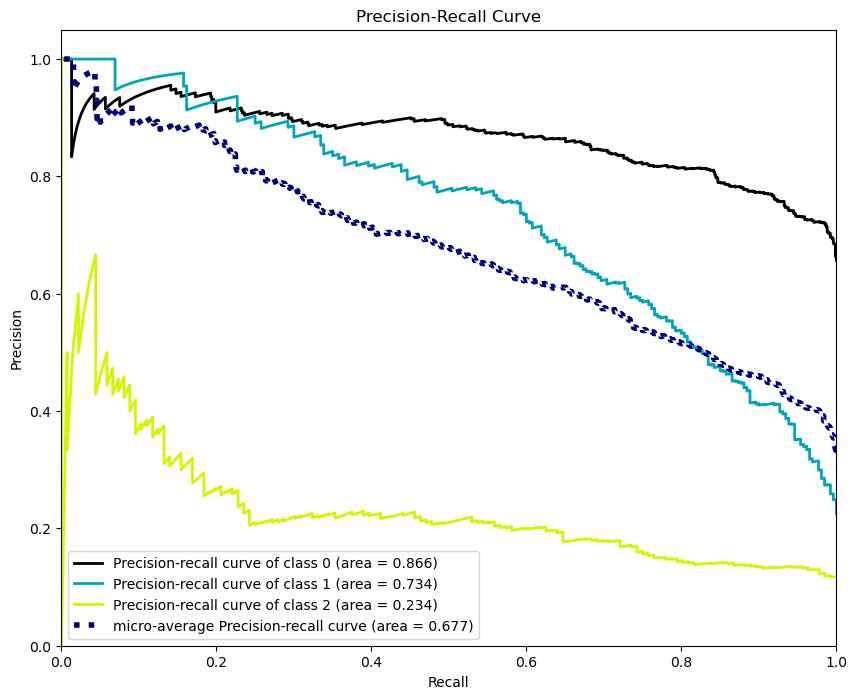

In [131]:
operations = [
    ('OrdinalEncoder', trans_ord), 
    ('xgboost', XGBClassifier(olsample_bytree=0.5,
                 learning_rate= 0.05,
                 max_depth=2,
                 n_estimators= 20,
                 subsample= 0.8,
                 random_state=101))
                                    ]

                                           
model = Pipeline(steps=operations)

model.fit(X_train_xg, y_train_xg, xgboost__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test_xg)

plot_precision_recall(y_test_xg, y_pred_proba)
plt.show()

In [132]:
# y_pred_proba = model.predict_proba(X_test_xg)

In [133]:
y_test_dum = pd.get_dummies(y_test_xg).values

average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])

0.7338545430526316

In [134]:
y_train_xg

1525    0
3111    0
3869    0
4666    1
3124    0
       ..
1388    0
3358    1
4501    1
5653    0
4921    1
Name: DODRace, Length: 4615, dtype: int64

In [135]:
xg_recall = recall_score(y_test_xg, y_pred, average=None, labels=[2])

In [136]:
xg_pre = average_precision_score(y_test_dum[:, 1], y_pred_proba[:, 1])
xg_recall = recall_score(y_test_xg, y_pred, average=None, labels=[2])
xg_f1 = f1_score(y_test_xg, y_pred, average=None, labels=[2])

In [137]:
print('Precision', xg_pre)
print('Recall', xg_recall)
print('f1', xg_f1)

Precision 0.7338545430526316
Recall [0.55882353]
f1 [0.30894309]


## Comparing

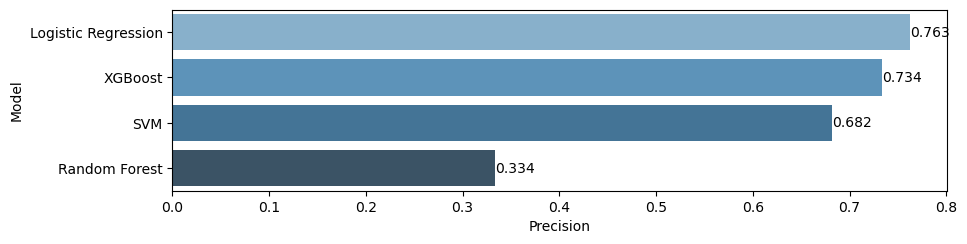

[Text(0, 0, '0.634'),
 Text(0, 0, '0.603'),
 Text(0, 0, '0.312'),
 Text(0, 0, '0.309')]

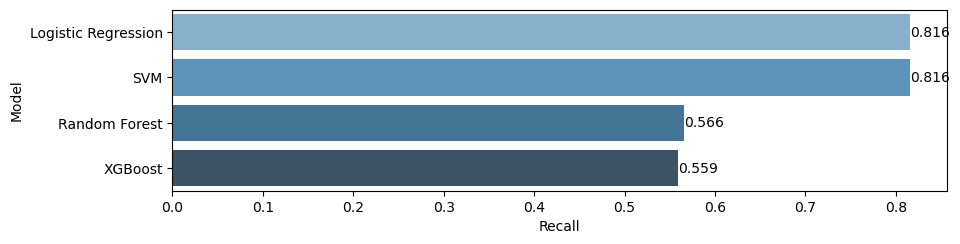

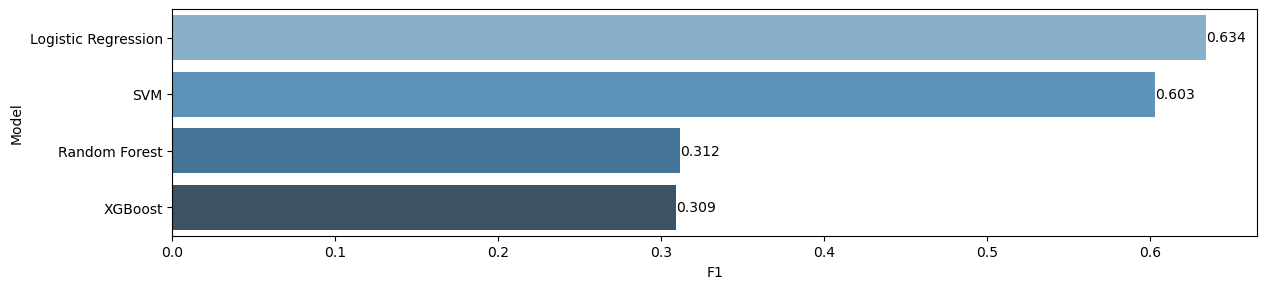

In [138]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "Precision": [logistic_pre, svc_pre, rf_pre, xg_pre],
        "Recall": [logistic_recall[0], svc_recall[0], rf_recall[0], xg_recall[0]],
        "F1": [logistic_f1[0], svc_f1[0], rf_f1[0], xg_f1[0]]
    }
)

plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax = sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();


plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.figure(figsize=(14, 10))
plt.subplot(313)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


#As we can see from the graphs, the logistic regression is higher in two scores, so I will go with it

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [139]:
# !pip install imblearn

In [140]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import ClusterCentroids

In [141]:
s_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), objs),
                            remainder=MinMaxScaler(),verbose_feature_names_out=False)

## Logistic Regression Over/ Under Sampling

### underSampling to the data

In [142]:
X_train_trans = s_trans.fit_transform(X_train)
X_test_trans = s_trans.transform(X_test) 
# We apply fit_transform on the train data only. 

clu = ClusterCentroids(random_state=101)
X_res, y_res = clu.fit_resample(X_train_trans, y_train)

In [143]:
lg_res = LogisticRegression(C=1,
                               max_iter=10000, 
                               random_state=101)

lg_res.fit(X_res, y_res)

LogisticRegression(C=1, max_iter=10000, random_state=101)

In [144]:
def eval_metric_(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_res)
    y_pred = model.predict(X_test_trans)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_res, y_train_pred))
    print(classification_report(y_res, y_train_pred))

In [145]:
eval_metric_(lg_res, X_res, y_res, X_test, y_test)

Test_Set
[[237  15   8]
 [  5 114  17]
 [ 35 124 599]]
              precision    recall  f1-score   support

       Black       0.86      0.91      0.88       260
    Hispanic       0.45      0.84      0.59       136
       White       0.96      0.79      0.87       758

    accuracy                           0.82      1154
   macro avg       0.76      0.85      0.78      1154
weighted avg       0.88      0.82      0.84      1154


Train_Set
[[515  18  10]
 [ 26 454  63]
 [  1  51 491]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95       543
    Hispanic       0.87      0.84      0.85       543
       White       0.87      0.90      0.89       543

    accuracy                           0.90      1629
   macro avg       0.90      0.90      0.90      1629
weighted avg       0.90      0.90      0.90      1629



### This is the result with under sampling. 
### As we can notice from it the train results are quit good, but the test result is less than the train. 
### I will try to do over sampling and see the result.

## OverSampling to the data

In [146]:
# We apply fit_transform on the train data only.
X_train_over = trans.fit_transform(X_train)
X_test_over = trans.transform(X_test) 

# when we use smote, we use only on the training data.
smote = SMOTE(sampling_strategy='auto', random_state=101)
X_over, y_over = smote.fit_resample(X_train_over, y_train)

In [147]:
# Implement the LogisticRegression model with the balanced data

logistic_over = LogisticRegression(C=1,
                                 max_iter=10000, 
                                 random_state=101)

logistic_over.fit(X_over, y_over)

LogisticRegression(C=1, max_iter=10000, random_state=101)

In [148]:
eval_metric_(logistic_over, X_over, y_over, X_test, y_test)

Test_Set
[[242   8  10]
 [  6 110  20]
 [ 25  80 653]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.56      0.81      0.66       136
       White       0.96      0.86      0.91       758

    accuracy                           0.87      1154
   macro avg       0.80      0.87      0.82      1154
weighted avg       0.89      0.87      0.88      1154


Train_Set
[[514  13  16]
 [ 21 447  75]
 [  1  35 507]]
              precision    recall  f1-score   support

       Black       0.96      0.95      0.95       543
    Hispanic       0.90      0.82      0.86       543
       White       0.85      0.93      0.89       543

    accuracy                           0.90      1629
   macro avg       0.90      0.90      0.90      1629
weighted avg       0.90      0.90      0.90      1629



### This is the result after over sampling, and it is nearly the same for the training, but much better than 
### under sampling in the test result. 
### Now, i will try both of them together and see the result how it will be

## Building the model with both under and over sampling

In [191]:
df_2["DODRace"].value_counts()
#as we can see the hispanic values in less than the others, but if we do over sampling to it, it will help it to balanced it.
#and the white values are quit high, so if we do under sampling to it, it will decreased and make it balanced with the others.
#so, i will do under to the white and over to the hispanic.

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

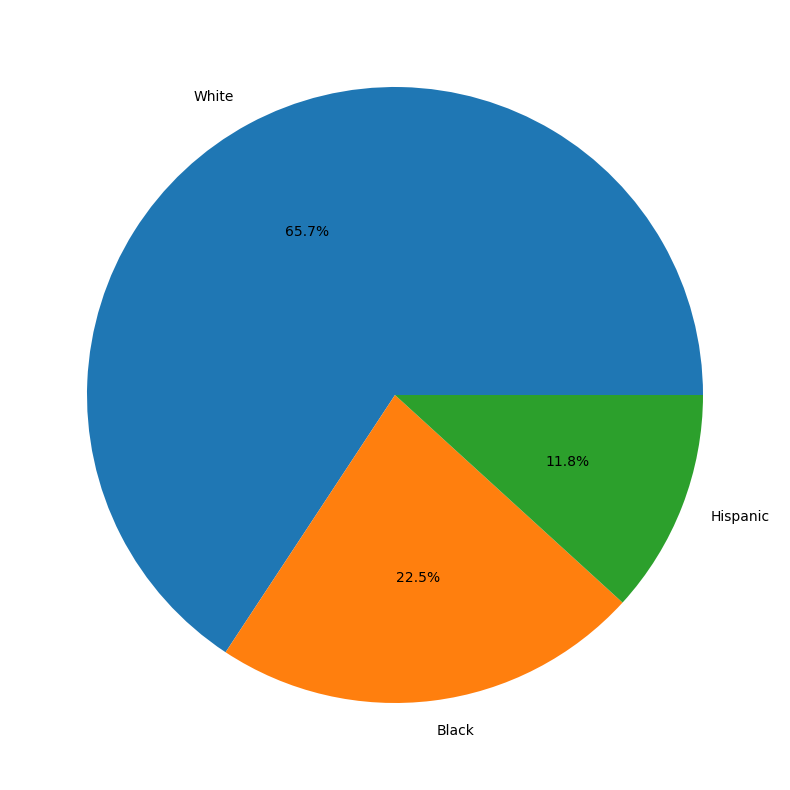

In [193]:
df_2["DODRace"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10))
plt.ylabel("");

In [194]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [187]:
operations = [('OneHotEncoder', trans), 
               ("over", over),
               ("under", under),
               ('logistic', LogisticRegression(C=1, penalty= 'l2', solver='lbfgs', max_iter=10000, random_state=101))]


smote_model = Pipeline(steps=operations)
smote_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('logistic',
                 LogisticRegression(C=1, max_iter=10000, random_state=101))])

In [188]:
eval_metric(smote_model, X_train, y_train, X_test, y_test)

Test_Set
[[237   6  17]
 [  5  96  35]
 [ 13  39 706]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.68      0.71      0.69       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 951   29   58]
 [  23  391  129]
 [  26  148 2860]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.69      0.72      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



### The result after under with over sampling is much better now.

In [189]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic    0.635
train_precision_Hispanic   0.694
test_recall_Hispanic       0.643
train_recall_Hispanic      0.716
test_f1_Hispanic           0.638
train_f1_Hispanic          0.705
dtype: float64

In [196]:
y_pred = smote_model.predict(X_test)
y_pred

array(['White', 'White', 'White', ..., 'White', 'White', 'White'],
      dtype=object)

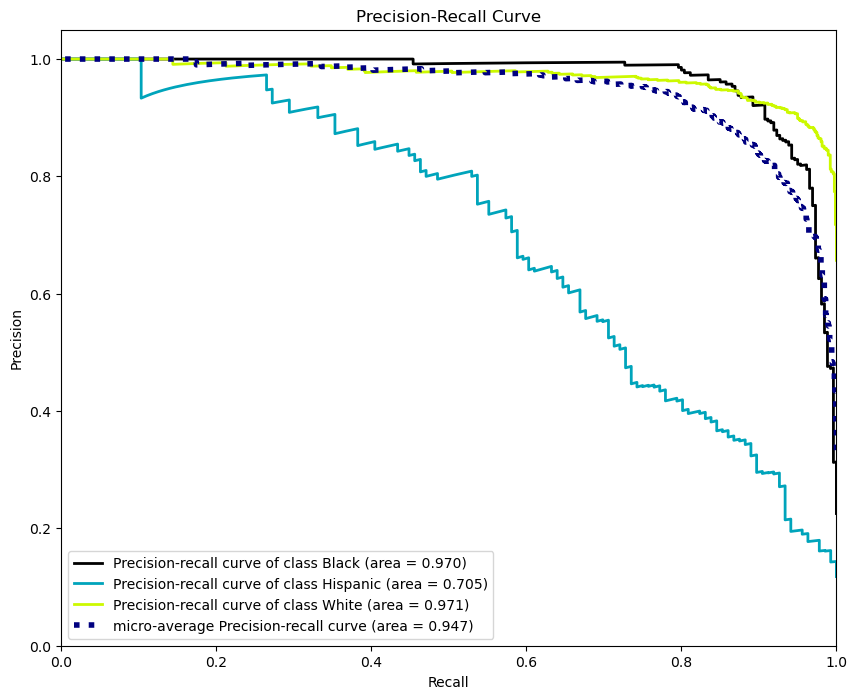

In [200]:
operations = [('OneHotEncoder', trans), 
               ("over", over),
               ("under", under),
               ('logistic', LogisticRegression(C=1, penalty= 'l2', solver='lbfgs', max_iter=10000, random_state=101))]


model = Pipeline(steps=operations)
model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)


plot_precision_recall(y_test, decision_function)
plt.show();

In [ ]:
#I liked the result with under and over sampling, so i will use it. 
#But also, i will do both of them, with it and with out it in the final model. 

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [197]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

0.8024498012871971

In [198]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

0.802419618982962

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

### This final model with class_weight="balanced"

In [150]:
#Using OneHotEncoder to convert the object values to be able to work with them
objs = ['Gender', 'SubjectsBirthLocation','WritingPreference']

trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse_output=False), objs),
                            remainder=MinMaxScaler(),verbose_feature_names_out=False)

trans = trans.set_output(transform="pandas")

In [151]:
df_2["DODRace"]

0          White
1          White
2          Black
3          White
4          Black
          ...   
5764    Hispanic
5765    Hispanic
5766       Black
5767    Hispanic
5768    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [152]:
X = df_2.drop("DODRace", axis=1)
y = df_2.DODRace

In [153]:
y

0          White
1          White
2          Black
3          White
4          Black
          ...   
5764    Hispanic
5765    Hispanic
5766       Black
5767    Hispanic
5768    Hispanic
Name: DODRace, Length: 5769, dtype: object

In [154]:
#Building the final model with the model data without separating them to test and train.
operations = [('OneHotEncoder', trans), ('logistic', LogisticRegression(class_weight="balanced", 
                                                                        C=1,
                                                                        penalty= 'l2', 
                                                                        solver='lbfgs',
                                                                        max_iter=10000, 
                                                                        random_state=101))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

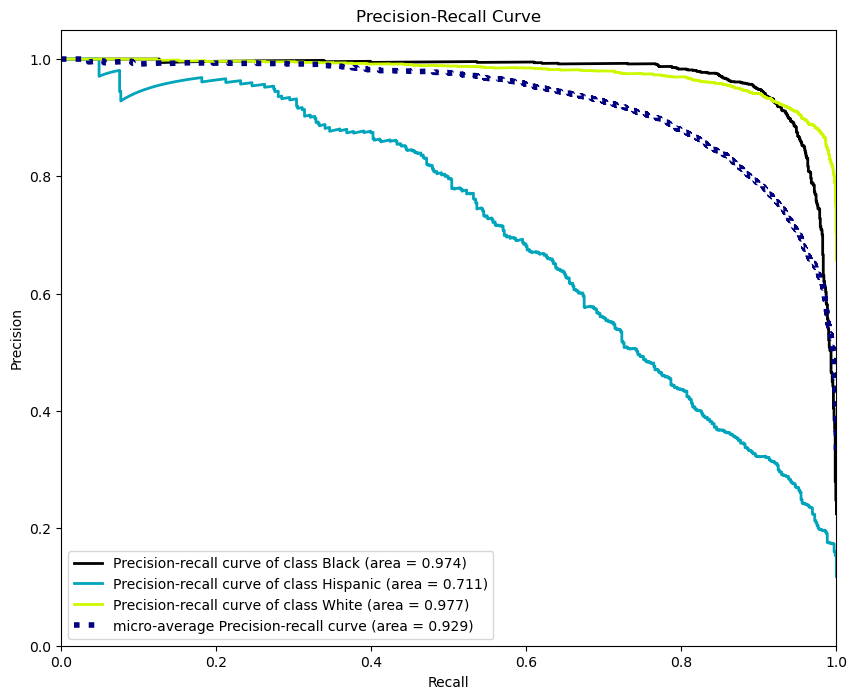

In [165]:
decision_function = final_model.decision_function(X)


plot_precision_recall(y, decision_function)
plt.show();

In [155]:
import pickle

In [156]:
pickle.dump(final_model, open('final_model', 'wb'))

In [157]:
new_model = pickle.load(open('final_model', 'rb'))

In [158]:
X.describe().T

count     mean     std      min      25%  \
abdominalextensiondepthsitting 5769.000  247.254  37.458  155.000  220.000   
acromialheight                 5769.000 1408.630  78.303 1146.000 1353.000   
acromionradialelength          5769.000  328.072  20.445  249.000  314.000   
anklecircumference             5769.000  225.202  15.966  156.000  214.000   
axillaheight                   5769.000 1301.903  71.261 1062.000 1252.000   
...                                 ...      ...     ...      ...      ...   
waistheightomphalion           5769.000 1033.591  61.958  808.000  990.000   
weightkg                       5769.000  800.981 155.990  358.000  686.000   
wristcircumference             5769.000  169.308  13.061  124.000  159.000   
wristheight                    5769.000  831.335  47.322  688.000  798.000   
Age                            5769.000   29.776   8.707   17.000   23.000   

                                    50%      75%      max  
abdominalextensiondepthsitting  243.000  272.000  451.000  
acromialheight                 1412.000 1464.000 1683.000  
acromionradialelength           328.000  342.000  393.000  
anklecircumference              225.000  235.000  293.000  
axillaheight                   1304.000 1351.000 1553.000  
...                                 ...      ...      ...  
waistheightomphalion           1035.000 1077.000 1245.000  
weightkg                        790.000  900.000 1442.000  
wristcircumference              171.000  179.000  216.000  
wristheight                     831.000  864.000 1009.000  
Age                              28.000   36.000   58.000  

[94 rows x 8 columns]

### Predicting with the model

In [159]:
my_dict = {"abdominalextensiondepthsitting":215.44909,
'acromialheight':1342.946397,
'acromionradialelength':335.819441,
'anklecircumference':229.590921,
'axillaheight':1331.098487,
'balloffootcircumference':  252,
'balloffootlength': 201.2,
'biacromialbreadth':  416,
'bicepscircumferenceflexed': 3536,
'bicristalbreadth': 275,
'bideltoidbreadth': 510,
'bimalleolarbreadth':  74,
'bitragionchinarc': 331,
'bitragionsubmandibulararc':3159,
'bizygomaticbreadth': 142,
'buttockcircumference':1021,
'buttockdepth': 246.362401,
'buttockheight': 889.500385,
'buttockkneelength': 619,
'buttockpopliteallength': 504,
'calfcircumference':  392,
'cervicaleheight': 1519.42216,
'chestbreadth': 289,
'chestcircumference':1060,
'chestdepth':   254.3901,
'chestheight':1293.040267,
'crotchheight': 847.637599,
'crotchlengthomphalion': 623,
'crotchlengthposterioromphalion': 356,
'earbreadth':34,
'earlength':   60,
'earprotrusion'             :  23,
'elbowrestheight'               : 204,
'eyeheightsitting'              : 800,
'footbreadthhorizontal'         : 100,
'footlength'                    : 270,
'forearmcenterofgriplength'     :  349,
'forearmcircumferenceflexed'    : 310,
'forearmforearmbreadth'         : 500,
'forearmhandlength'             : 400,
'functionalleglength'           :1002,
'handbreadth'                   :  78,
'handcircumference'             : 202,
'handlength'                    : 183,
'headbreadth'                   : 134,
'headcircumference'             :  47,
'headlength'                    : 199,
'heelanklecircumference'        : 304,
'heelbreadth'                   :  72,
'hipbreadth'                    : 346,
'hipbreadthsitting'             : 379,
'iliocristaleheight'            : 106,
'interpupillarybreadth'         : 639,
'interscyei'                    : 431,
'interscyeii'                   : 450,
'kneeheightmidpatella'          : 489,
'kneeheightsitting'             : 555,
'lateralfemoralepicondyleheight': 492,
'lateralmalleolusheight'        :  73,
'lowerthighcircumference'       : 409,
'mentonsellionlength'           : 122,
'neckcircumference'             : 398,
'neckcircumferencebase'         : 435,
'overheadfingertipreachsitting' :1428,
'palmlength'                    : 116,
'poplitealheight'               : 430,
'radialestylionlength'          : 268,
'shouldercircumference'         :1179,
'shoulderelbowlength'           : 364,
'shoulderlength'                : 149,
'sittingheight'                 : 918,
'sleevelengthspinewrist'        :800,
'sleeveoutseam'                 : 594,
'span'                          :1816,
'stature'                       :1758,
'suprasternaleheight'           :1440,
'tenthribheight'                :1122,
'thighcircumference'            : 626,
'thighclearance'                :  180,
'thumbtipreach'                 : 613,
'tibialheight'                  : 569,
'tragiontopofhead'              : 131,
'trochanterionheight'           : 812,
'verticaltrunkcircumferenceusa' :1556,
'waistbacklength'               : 478,
'waistbreadth'                  : 327,
'waistcircumference'            : 943,
'waistdepth'                    :   248,
'waistfrontlengthsitting'       :  388,
'waistheightomphalion'          :1058,
'weightkg'                      : 858,
'wristcircumference'            : 176,
'wristheight'                   : 848,
'Gender'                        :        'Male',
'SubjectsBirthLocation'         :        'Texas',
'Age'                           :  30.172352,
'WritingPreference'             :        'Left hand'}

In [160]:
pr = pd.DataFrame([my_dict])
pr

#Converting the dictionary to dataframe to be able to use it.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                         215.449        1342.946                335.819   

   anklecircumference  axillaheight  balloffootcircumference  \
0             229.591      1331.098                      252   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0           201.200                416                       3536   

   bicristalbreadth  ...  waistdepth  waistfrontlengthsitting  \
0               275  ...         248                      388   

   waistheightomphalion  weightkg  wristcircumference  wristheight  Gender  \
0                  1058       858                 176          848    Male   

   SubjectsBirthLocation    Age  WritingPreference  
0                  Texas 30.172          Left hand  

[1 rows x 97 columns]

In [161]:
df_2['SubjectsBirthLocation']

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
5764             Texas
5765             Texas
5766             Texas
5767             Texas
5768             Texas
Name: SubjectsBirthLocation, Length: 5769, dtype: object

In [162]:
df_2.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             266            1467                    337   
1                             233            1395                    326   
2                             287            1430                    341   
3                             234            1347                    310   
4                             250            1585                    372   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 222          1347                      253   
1                 220          1293                      245   
2                 230          1327                      256   
3                 230          1239                      262   
4                 247          1478                      267   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               202                401                        369   
1               193                394                        338   
2               196                427                        408   
3               199                401                        359   
4               224                435                        356   

   bicristalbreadth  ...  waistfrontlengthsitting  waistheightomphalion  \
0               274  ...                      440                  1054   
1               257  ...                      371                  1054   
2               261  ...                      411                  1041   
3               262  ...                      399                   968   
4               263  ...                      379                  1245   

   weightkg  wristcircumference  wristheight  Gender  SubjectsBirthLocation  \
0       815                 175          853    Male           North Dakota   
1       726                 167          815    Male               New York   
2       929                 180          831    Male               New York   
3       794                 176          793    Male              Wisconsin   
4       946                 188          954    Male         North Carolina   

   DODRace  Age  WritingPreference  
0    White   41         Right hand  
1    White   35          Left hand  
2    Black   42          Left hand  
3    White   31         Right hand  
4    Black   21         Right hand  

[5 rows x 98 columns]

In [163]:
# df_2.columns

In [164]:
final_model.predict(pr)
#Now, i am predicting the values that i put in the dictionary. as we can see it gave us Hispanic or 2

array(['Hispanic'], dtype=object)

### The fianl model with under and over sampling

In [201]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [202]:
operations = [('OneHotEncoder', trans), 
               ("over", over),
               ("under", under),
               ('logistic', LogisticRegression(C=1, penalty= 'l2', solver='lbfgs', max_iter=10000, random_state=101))]


smote_final_model = Pipeline(steps=operations)
smote_final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])],
                                   verbose_feature_names_out=False)),
                ('over', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('under',
                 RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('logistic',
                 LogisticRegression(C=1, max_iter=10000, random_state=101))])

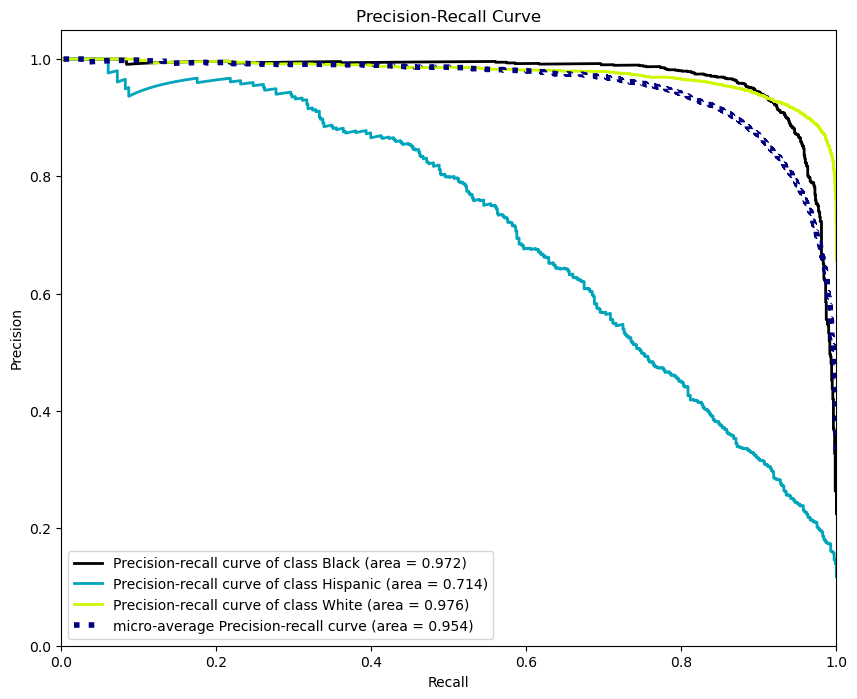

In [203]:
decision_function = smote_final_model.decision_function(X)


plot_precision_recall(y, decision_function)
plt.show();

In [210]:
pickle.dump(smote_final_model, open('smote_final_model', 'wb'))

In [211]:
new_model = pickle.load(open('smote_final_model', 'rb'))

In [224]:
my_dict2 = {"abdominalextensiondepthsitting":200,
'acromialheight':1000,
'acromionradialelength':300,
'anklecircumference':200,
'axillaheight':1200,
'balloffootcircumference':  240,
'balloffootlength': 250,
'biacromialbreadth':  516,
'bicepscircumferenceflexed': 3936,
'bicristalbreadth': 275,
'bideltoidbreadth': 910,
'bimalleolarbreadth':  74,
'bitragionchinarc': 331,
'bitragionsubmandibulararc':3159,
'bizygomaticbreadth': 142,
'buttockcircumference':1021,
'buttockdepth': 246,
'buttockheight': 889,
'buttockkneelength': 619,
'buttockpopliteallength': 504,
'calfcircumference':  392,
'cervicaleheight': 1519,
'chestbreadth': 289,
'chestcircumference':1060,
'chestdepth':   200,
'chestheight':1100,
'crotchheight': 800,
'crotchlengthomphalion': 603,
'crotchlengthposterioromphalion': 356,
'earbreadth':30,
'earlength':   40,
'earprotrusion'             :  20,
'elbowrestheight'               : 204,
'eyeheightsitting'              : 600,
'footbreadthhorizontal'         : 100,
'footlength'                    : 270,
'forearmcenterofgriplength'     :  349,
'forearmcircumferenceflexed'    : 310,
'forearmforearmbreadth'         : 500,
'forearmhandlength'             : 400,
'functionalleglength'           :1002,
'handbreadth'                   :  78,
'handcircumference'             : 202,
'handlength'                    : 183,
'headbreadth'                   : 134,
'headcircumference'             :  47,
'headlength'                    : 199,
'heelanklecircumference'        : 304,
'heelbreadth'                   :  72,
'hipbreadth'                    : 346,
'hipbreadthsitting'             : 379,
'iliocristaleheight'            : 106,
'interpupillarybreadth'         : 639,
'interscyei'                    : 431,
'interscyeii'                   : 450,
'kneeheightmidpatella'          : 489,
'kneeheightsitting'             : 555,
'lateralfemoralepicondyleheight': 492,
'lateralmalleolusheight'        :  73,
'lowerthighcircumference'       : 409,
'mentonsellionlength'           : 122,
'neckcircumference'             : 398,
'neckcircumferencebase'         : 435,
'overheadfingertipreachsitting' :1428,
'palmlength'                    : 116,
'poplitealheight'               : 430,
'radialestylionlength'          : 268,
'shouldercircumference'         :1179,
'shoulderelbowlength'           : 364,
'shoulderlength'                : 149,
'sittingheight'                 : 918,
'sleevelengthspinewrist'        :800,
'sleeveoutseam'                 : 594,
'span'                          :1816,
'stature'                       :1758,
'suprasternaleheight'           :1440,
'tenthribheight'                :1122,
'thighcircumference'            : 626,
'thighclearance'                :  180,
'thumbtipreach'                 : 613,
'tibialheight'                  : 569,
'tragiontopofhead'              : 131,
'trochanterionheight'           : 812,
'verticaltrunkcircumferenceusa' :1556,
'waistbacklength'               : 478,
'waistbreadth'                  : 327,
'waistcircumference'            : 943,
'waistdepth'                    :   248,
'waistfrontlengthsitting'       :  388,
'waistheightomphalion'          :1058,
'weightkg'                      : 858,
'wristcircumference'            : 176,
'wristheight'                   : 848,
'Gender'                        :        'Female',
'SubjectsBirthLocation'         :        'New York',
'Age'                           :  20,
'WritingPreference'             :        'Right hand'}

In [225]:
df_2.SubjectsBirthLocation

0         North Dakota
1             New York
2             New York
3            Wisconsin
4       North Carolina
             ...      
5764             Texas
5765             Texas
5766             Texas
5767             Texas
5768             Texas
Name: SubjectsBirthLocation, Length: 5769, dtype: object

In [226]:
pr2 = pd.DataFrame([my_dict2])
pr2

#Converting the dictionary to dataframe to be able to use it.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                             200            1000                    300   

   anklecircumference  axillaheight  balloffootcircumference  \
0                 200          1200                      240   

   balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0               250                516                       3936   

   bicristalbreadth  ...  waistdepth  waistfrontlengthsitting  \
0               275  ...         248                      388   

   waistheightomphalion  weightkg  wristcircumference  wristheight  Gender  \
0                  1058       858                 176          848  Female   

   SubjectsBirthLocation  Age  WritingPreference  
0               New York   20         Right hand  

[1 rows x 97 columns]

In [227]:
smote_final_model.predict(pr2)
#Now, i am predicting the values that i put in the dictionary. as we can see it gave us Hispanic or 2

array(['Hispanic'], dtype=object)

# That is the end of my note book.
# Thanks for reading it and looking at it.
# Muchas Gracias, Danke, ありがとうございました

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___